# Dataset Description

The competition dataset comprises a set of timeseries with 79 features and 9 responders, anonymized but representing real market data. The goal of the competition is to forecast one of these responders, i.e., `responder_6`, for up to six months in the future.

You must submit to this competition using the provided Python evaluation API, which serves test set data one timestep by timestep. To use the API, follow the example in [this notebook](https://www.kaggle.com/code/ryanholbrook/jane-street-rmf-demo-submission). (Note that this API is different from our legacy timeseries API used in past forecasting competitions.)

In [1]:
import pandas as pd
import numpy as np
import polars as pl
import pyarrow
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
import seaborn as sns

In [2]:
import os

if os.path.exists("/kaggle/input/"):
  ROOT_DIR = "/kaggle/input/jane-street-real-time-market-data-forecasting"
else:
  ROOT_DIR = os.path.abspath("../data")

ROOT_DIR

'/home/peara/projects/kaggle/jsk/data'

# Features

- features.csv - metadata pertaining to the anonymized features

In [3]:
features = pd.read_csv(f"{ROOT_DIR}/features.csv")
features

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16
0,feature_00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,feature_01,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True
2,feature_02,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,feature_03,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,feature_04,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,feature_74,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
75,feature_75,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
76,feature_76,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
77,feature_77,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


In [4]:
tags = ['tag_' + str(i) for i in range(17)]
tags

['tag_0',
 'tag_1',
 'tag_2',
 'tag_3',
 'tag_4',
 'tag_5',
 'tag_6',
 'tag_7',
 'tag_8',
 'tag_9',
 'tag_10',
 'tag_11',
 'tag_12',
 'tag_13',
 'tag_14',
 'tag_15',
 'tag_16']

In [5]:
features[tags]

,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True
2,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
75,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
76,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
77,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


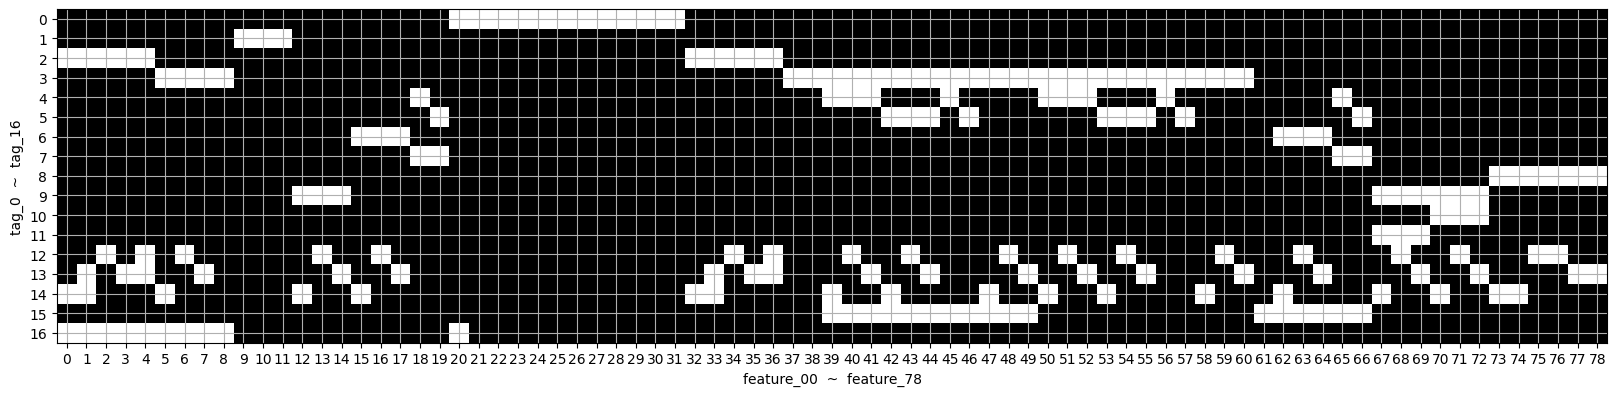

In [6]:
plt.figure(figsize=(20, 10))
plt.imshow(features.iloc[:, 1:].T.values, cmap="gray")
plt.xlabel("feature_00  ~  feature_78")
plt.ylabel("tag_0  ~  tag_16")
plt.yticks(np.arange(17))
plt.xticks(np.arange(79))
plt.grid()
plt.show()

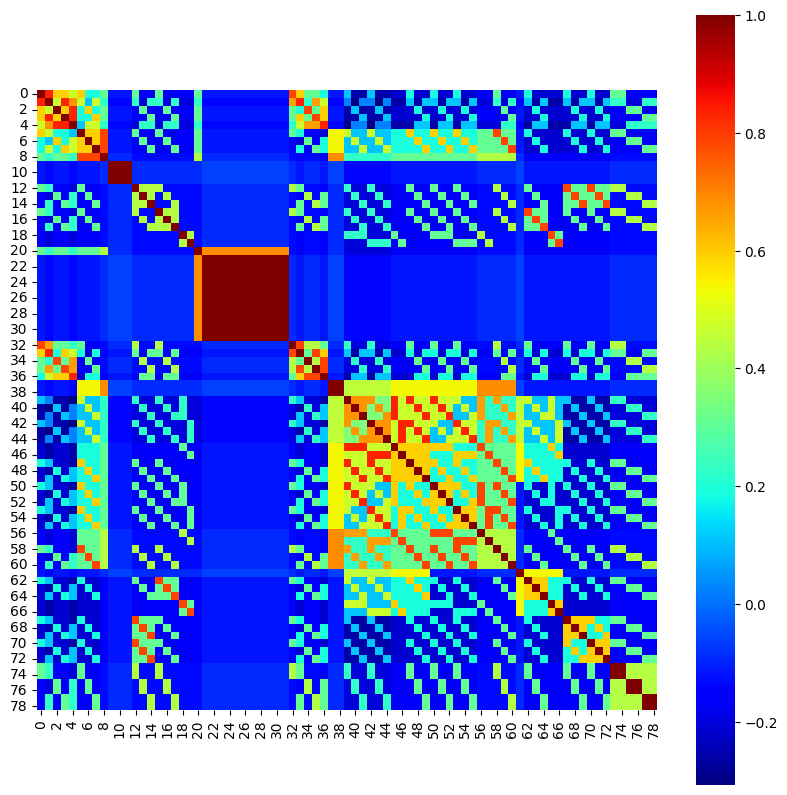

In [7]:
# corr between feature_XX and feature_YY
plt.figure(figsize=(10, 10))
sns.heatmap(features[[ f"tag_{no}" for no in range(0,17,1) ] ].T.corr(), square=True, cmap="jet")
plt.show()

These are the visualization of relations of metadata between tags of features.  
There may not hold much value in this task.

# Responders

- responders.csv - metadata pertaining to the anonymized responders

In [8]:
responders = pd.read_csv(f"{ROOT_DIR}/responders.csv")
responders

,responder,tag_0,tag_1,tag_2,tag_3,tag_4
0,responder_0,True,False,True,False,False
1,responder_1,True,False,False,True,False
2,responder_2,True,True,False,False,False
3,responder_3,False,False,True,False,True
4,responder_4,False,False,False,True,True
5,responder_5,False,True,False,False,True
6,responder_6,False,False,True,False,False
7,responder_7,False,False,False,True,False
8,responder_8,False,True,False,False,False


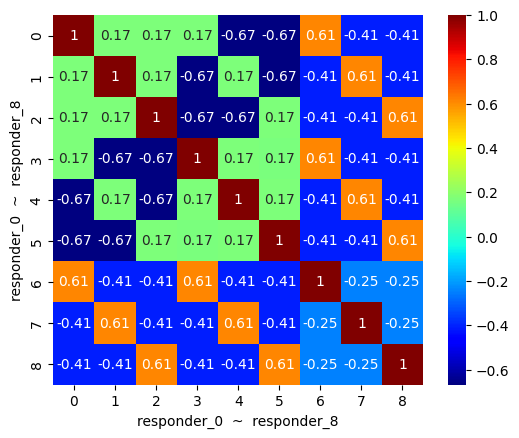

In [9]:
# corr between responder_XX and responder_YY
sns.heatmap(responders[[ f"tag_{no}" for no in range(0,5,1) ] ].T.corr(),  annot=True, square=True, cmap="jet")
plt.xlabel("responder_0  ~  responder_8")
plt.ylabel("responder_0  ~  responder_8")
plt.show()

This is the visualization of relations of metadata between tags of responders.

# Sample submission

- **sample_submission.csv** - This file illustrates the format of the predictions your model should make.

In [10]:
sub = pd.read_csv(f"{ROOT_DIR}/sample_submission.csv")
print( f"sub.shape = {sub.shape}" )
sub

sub.shape = (39, 2)


,row_id,responder_6
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


# Train.parquet

- **train.parquet** - The training set, contains historical data and returns. For convenience, the training set has been partitioned into ten parts.
  - `date_id` and `time_id` - Integer values that are ordinally sorted, providing a chronological structure to the data, although the actual time intervals between `time_id` values may vary.
  - `symbol_id` - Identifies a unique financial instrument.
  - `weight` - The weighting used for calculating the scoring function.
  - `feature_{00...78}` - Anonymized market data.
  - `responder_{0...8}` - Anonymized responders clipped between -5 and 5. The responder_6 field is what you are trying to predict.
  
  
Each row in the `{train/test}.parquet` dataset corresponds to a unique combination of a symbol (identified by `symbol_id`) and a timestamp (represented by `date_id` and `time_id`). You will be provided with multiple responders, with `responder_6` being the only responder used for scoring. The date_id column is an integer which represents the day of the event, while time_id represents a time ordering. It's important to note that the real time differences between each time_id are not guaranteed to be consistent.

The `symbol_id` column contains encrypted identifiers. Each `symbol_id` is not guaranteed to appear in all `time_id` and `date_id` combinations. Additionally, new `symbol_id` values may appear in future test sets.

In [12]:
train = pl.read_parquet(f"{ROOT_DIR}/train.parquet/partition_id=0/part-0.parquet")
train.shape

(1944210, 92)

In [14]:
train.head()

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0,1,3.889038,null,null,null,null,null,0.851033,0.242971,0.2634,-0.891687,11,7,76,-0.883028,0.003067,-0.744703,null,-0.169586,null,-1.335938,-1.707803,0.91013,null,1.636431,1.522133,-1.551398,-0.229627,null,null,1.378301,-0.283712,0.123196,null,null,…,0.204797,null,null,-0.808103,null,-2.037683,0.727661,null,-0.989118,-0.345213,-1.36224,null,null,null,null,null,-1.251104,-0.110252,-0.491157,-1.02269,0.152241,-0.659864,null,null,-0.261412,-0.211486,-0.335556,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
0,0,7,1.370613,null,null,null,null,null,0.676961,0.151984,0.192465,-0.521729,11,7,76,-0.865307,-0.225629,-0.582163,null,0.317467,null,-1.250016,-1.682929,1.412757,null,0.520378,0.744132,-0.788658,0.641776,null,null,0.2272,0.580907,1.128879,null,null,…,1.172836,null,null,-1.625862,null,-1.410017,1.063013,null,0.888355,0.467994,-1.36224,null,null,null,null,null,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,null,null,-0.281207,-0.182894,-0.245565,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639
0,0,9,2.285698,null,null,null,null,null,1.056285,0.187227,0.249901,-0.77305,11,7,76,-0.675719,-0.199404,-0.586798,null,-0.814909,null,-1.296782,-2.040234,0.639589,null,1.597359,0.657514,-1.350148,0.364215,null,null,-0.017751,-0.317361,-0.122379,null,null,…,0.535897,null,null,-0.72542,null,-2.29417,1.764551,null,-0.120789,-0.063458,-1.36224,null,null,null,null,null,-0.882604,-0.072482,-0.617934,-0.86323,-0.241892,-0.709919,null,null,0.377131,0.300724,-0.106842,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
0,0,10,0.690606,null,null,null,null,null,1.139366,0.273328,0.306549,-1.262223,42,5,150,-0.694008,3.004091,0.114809,null,-0.251882,null,-1.902009,-0.979447,0.241165,null,-0.392359,-0.224699,-2.129397,-0.855287,null,null,0.404142,-0.578156,0.105702,null,null,…,2.413415,null,null,1.313203,null,-0.810125,2.939022,null,3.988801,1.834661,-1.36224,null,null,null,null,null,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0.571554,null,null,-0.226891,-0.251412,-0.215522,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
0,0,14,0.44057,null,null,null,null,null,0.9552,0.262404,0.344457,-0.613813,44,3,16,-0.947351,-0.030018,-0.502379,null,0.646086,null,-1.844685,-1.58656,-0.182024,null,-0.969949,-0.673813,-1.282132,-1.399894,null,null,0.043815,-0.320225,-0.031713,null,null,…,1.253902,null,null,0.476195,null,-0.771732,2.843421,null,1.379815,0.411827,-1.36224,null,null,null,null,null,-0.948601,-0.136814,-0.447704,-1.141761,0.099631,-0.661928,null,null,3.678076,2.793581,2.61825,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.0,-3.57282,-1.089123,-5.0


In [15]:
print(str(train.columns))

['date_id', 'time_id', 'symbol_id', 'weight', 'feature_00', 'feature_01', 'feature_02', 'feature_03', 'feature_04', 'feature_05', 'feature_06', 'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'f

## Missing values

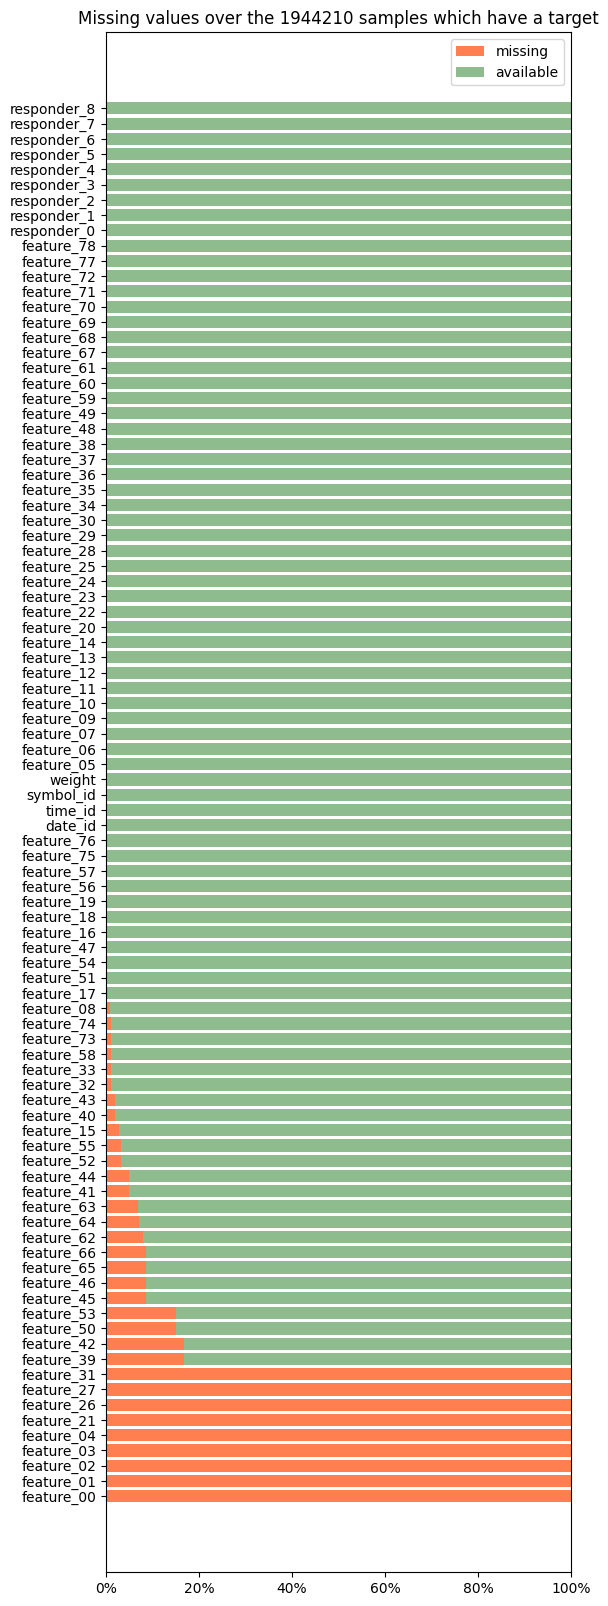

In [16]:
supervised_usable = (
    train
    .filter(pl.col('responder_6').is_not_null())
)

missing_count = (
    supervised_usable
    .null_count()
    .transpose(include_header=True,
               header_name='feature',
               column_names=['null_count'])
    .sort('null_count', descending=True)
    .with_columns((pl.col('null_count') / len(supervised_usable)).alias('null_ratio'))
)

plt.figure(figsize=(6, 20))
plt.title(f'Missing values over the {len(supervised_usable)} samples which have a target')
plt.barh(np.arange(len(missing_count)), missing_count.get_column('null_ratio'), color='coral', label='missing')
plt.barh(np.arange(len(missing_count)), 
         1 - missing_count.get_column('null_ratio'),
         left=missing_count.get_column('null_ratio'),
         color='darkseagreen', label='available')
plt.yticks(np.arange(len(missing_count)), missing_count.get_column('feature'))
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
plt.xlim(0, 1)
plt.legend()
plt.show()

There are several columns in the dataset that contain many missing values. However, in later parts of the dataset, the number of missing values decreases. This is likely due to the fact that the dataset is a time series, and the data collection process may have changed over time.  
Therefore, it is important to consider how to handle missing values in the dataset. Also, we have to prepare for the fact that the test dataset may contain missing values.

## feature_00-78

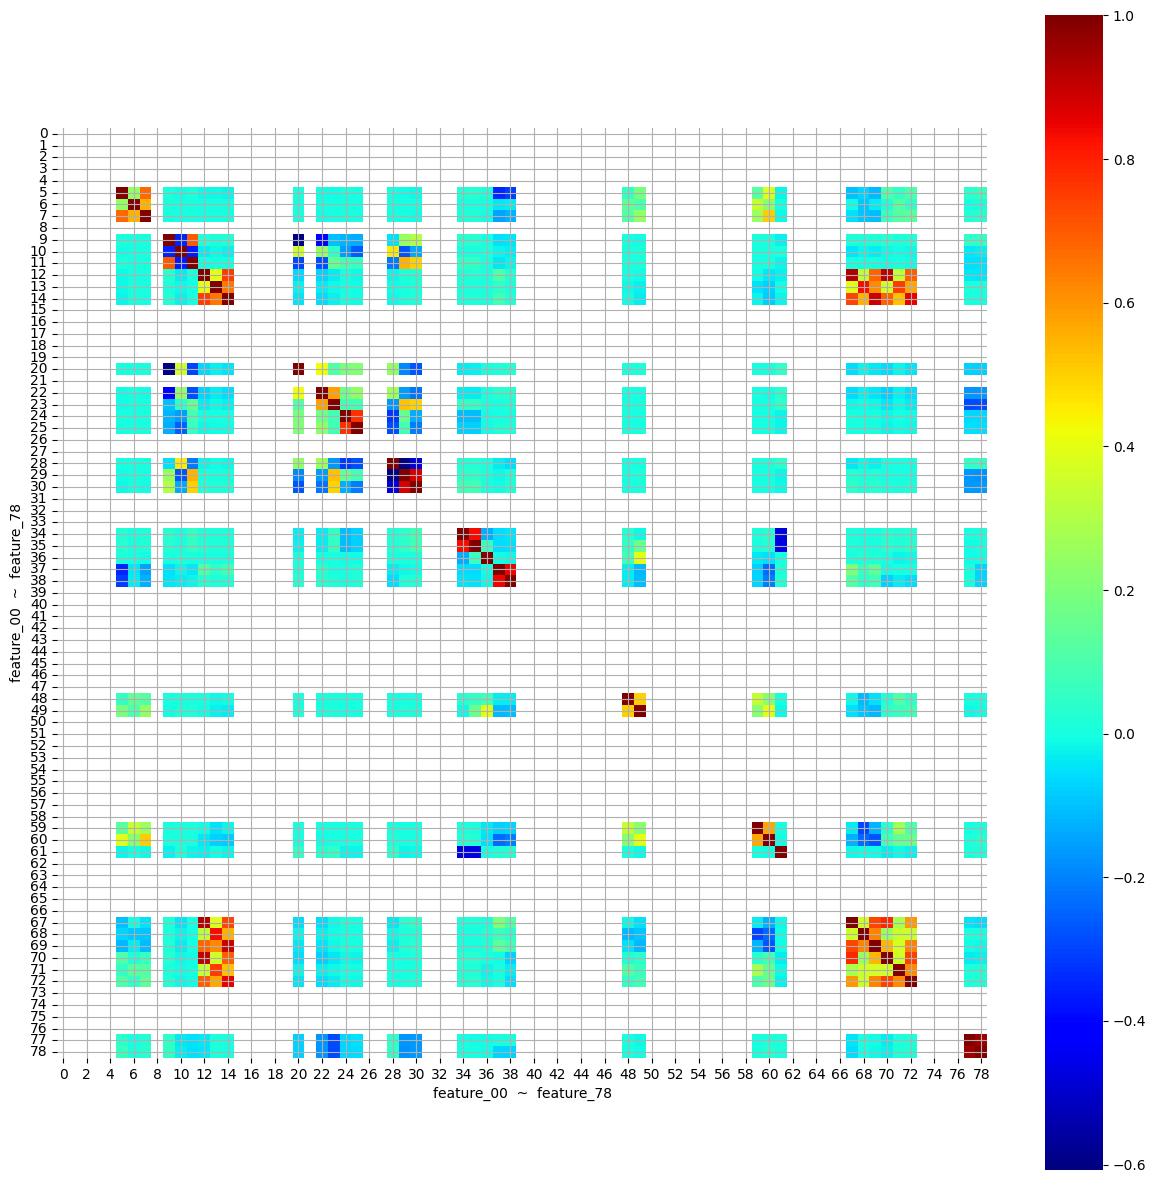

In [20]:
plt.figure(figsize=(15, 15))
sns.heatmap(train[[f"feature_{i:02d}" for i in range(79)]].corr(), square=True, cmap="jet")
plt.xlabel("feature_00  ~  feature_78")
plt.ylabel("feature_00  ~  feature_78")
plt.grid()
plt.show()

It seems that most features doesn't relate to each other.

We need to check if these correlations are changed by time, represented by each partition.

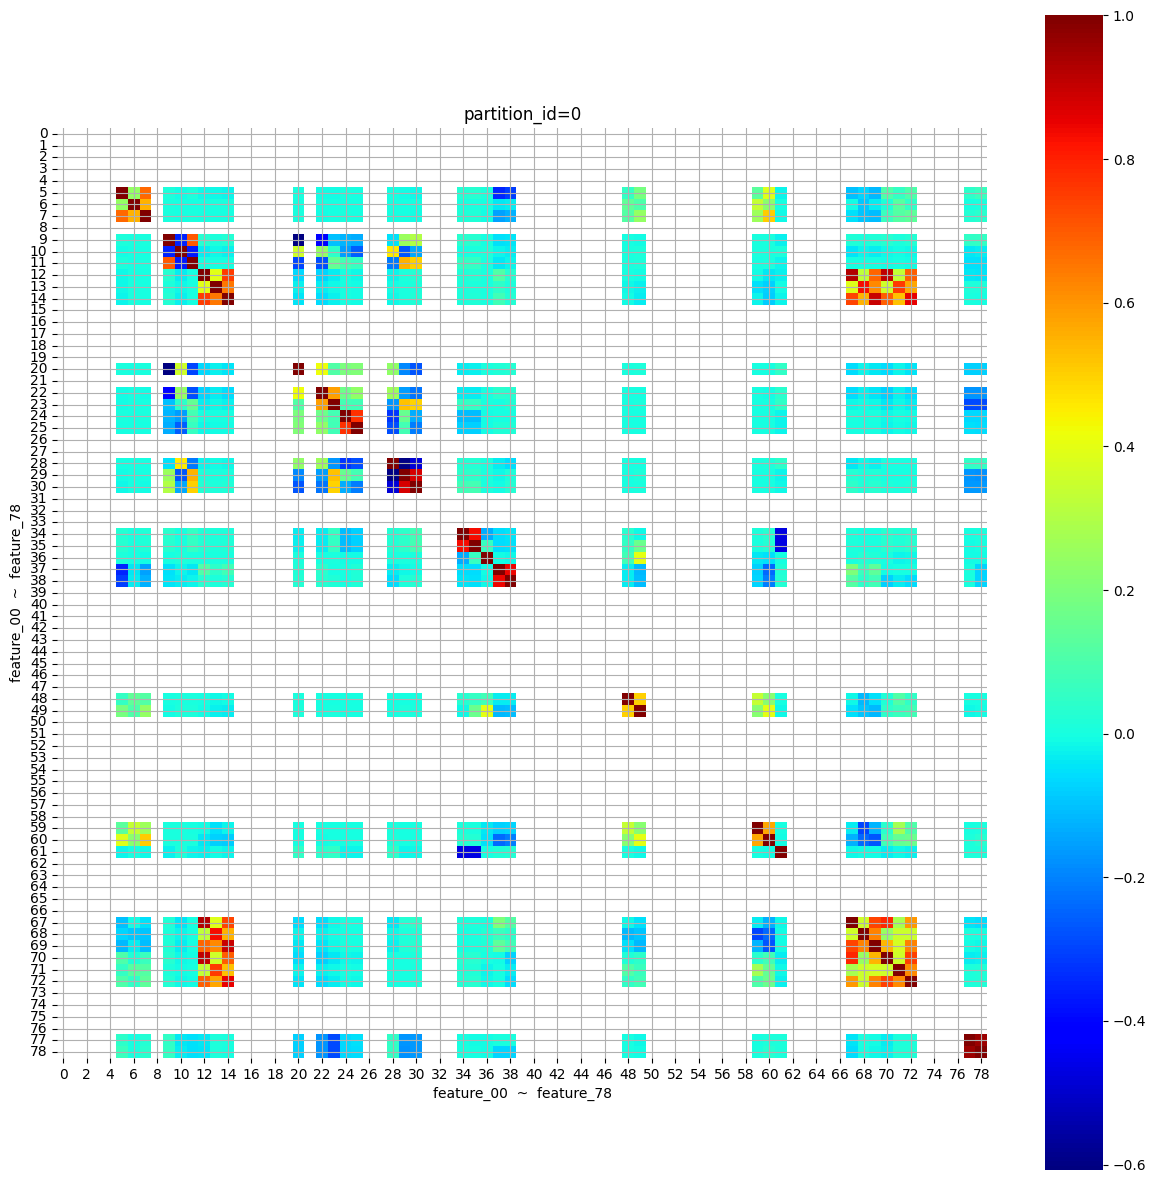

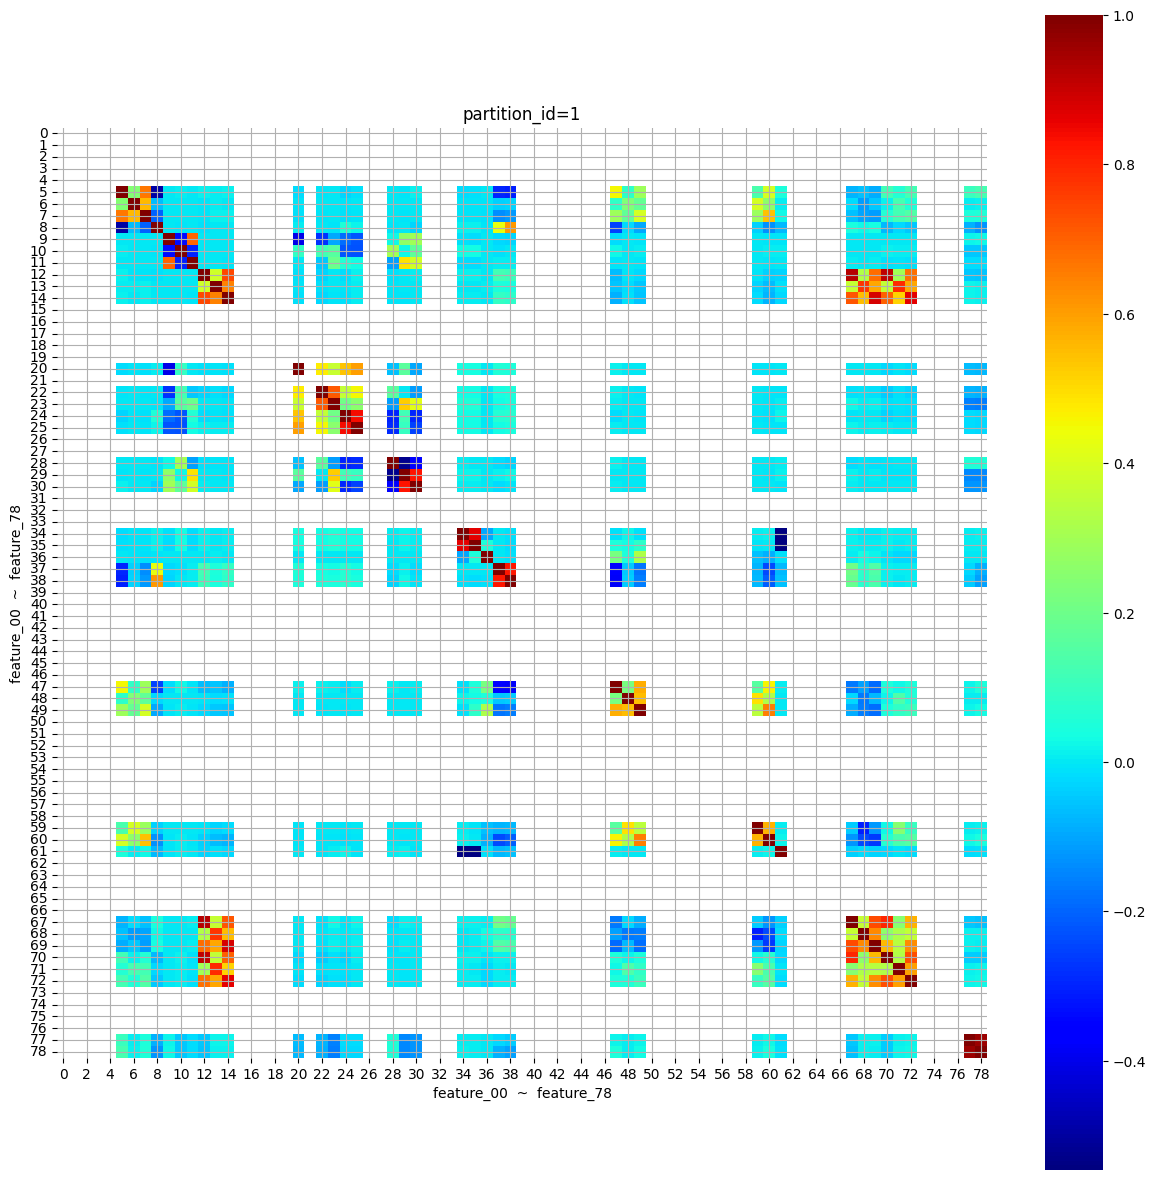

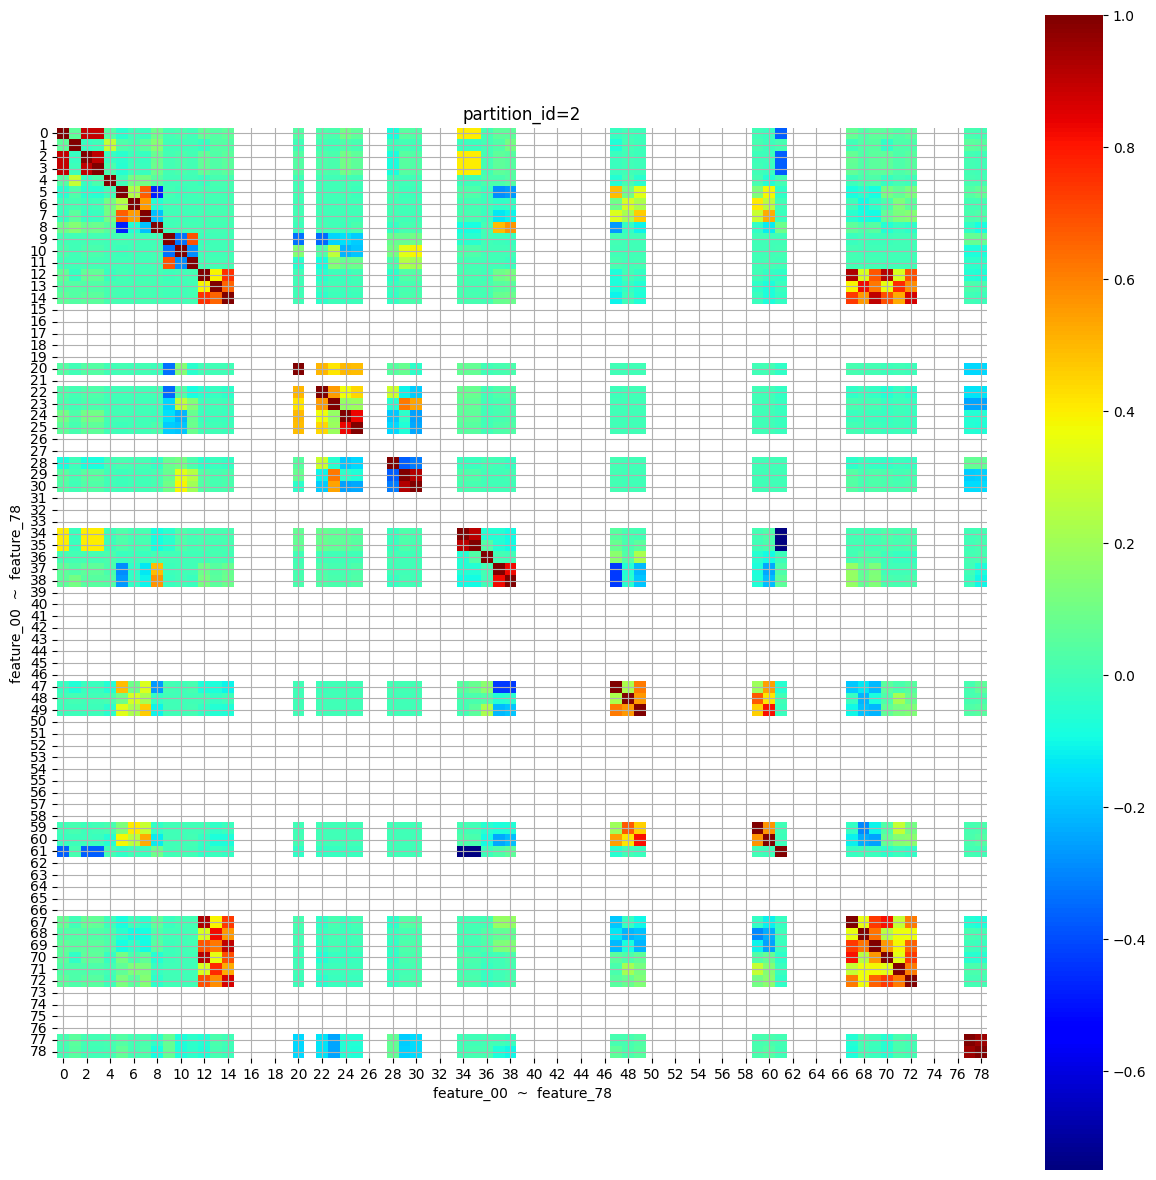

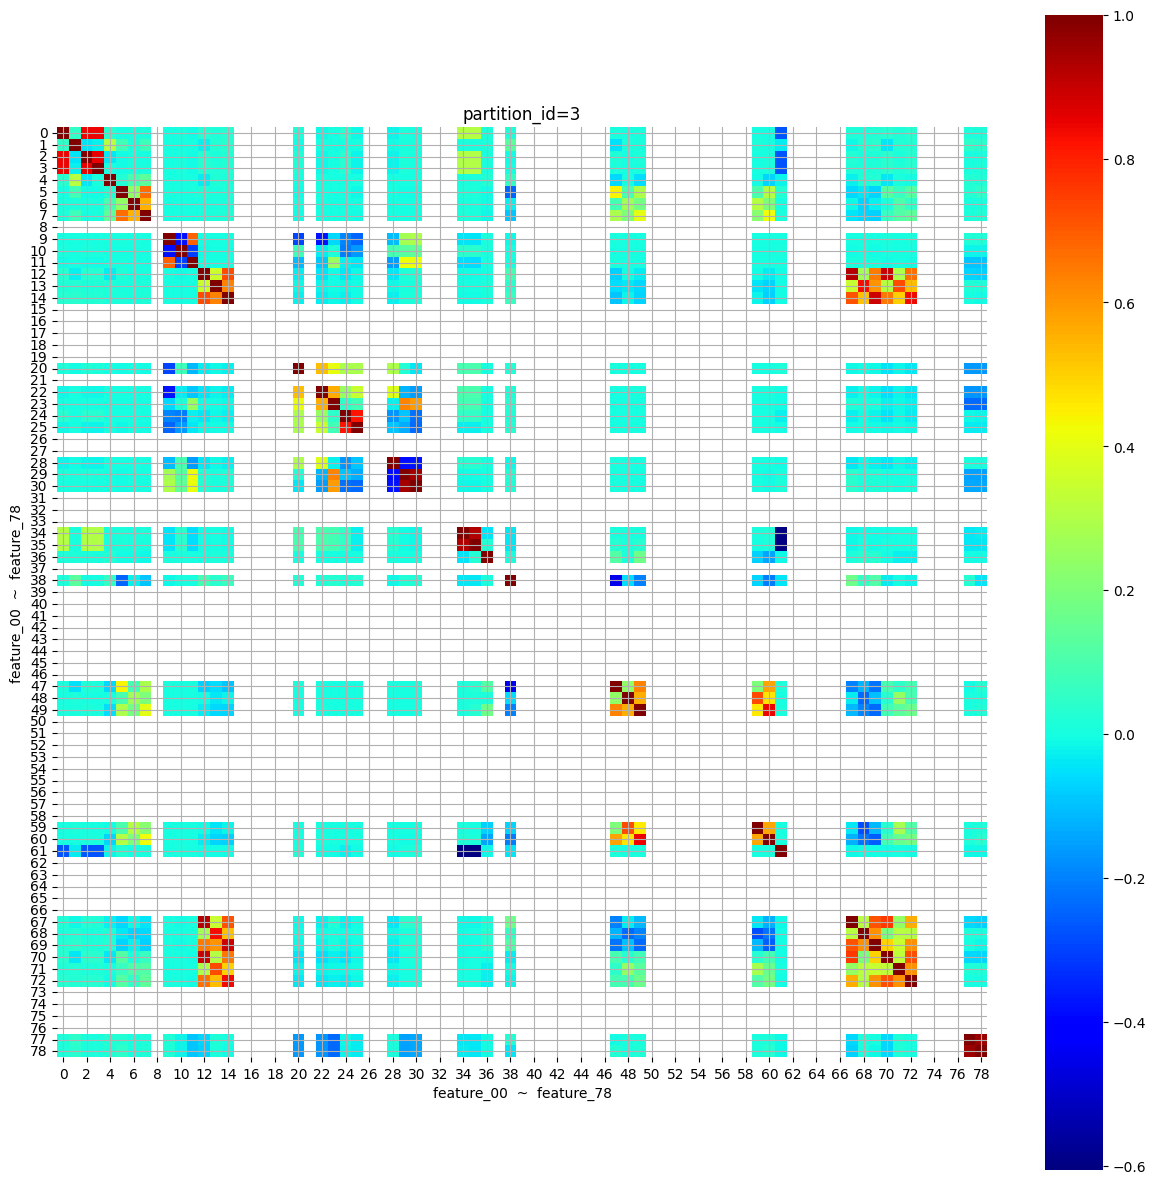

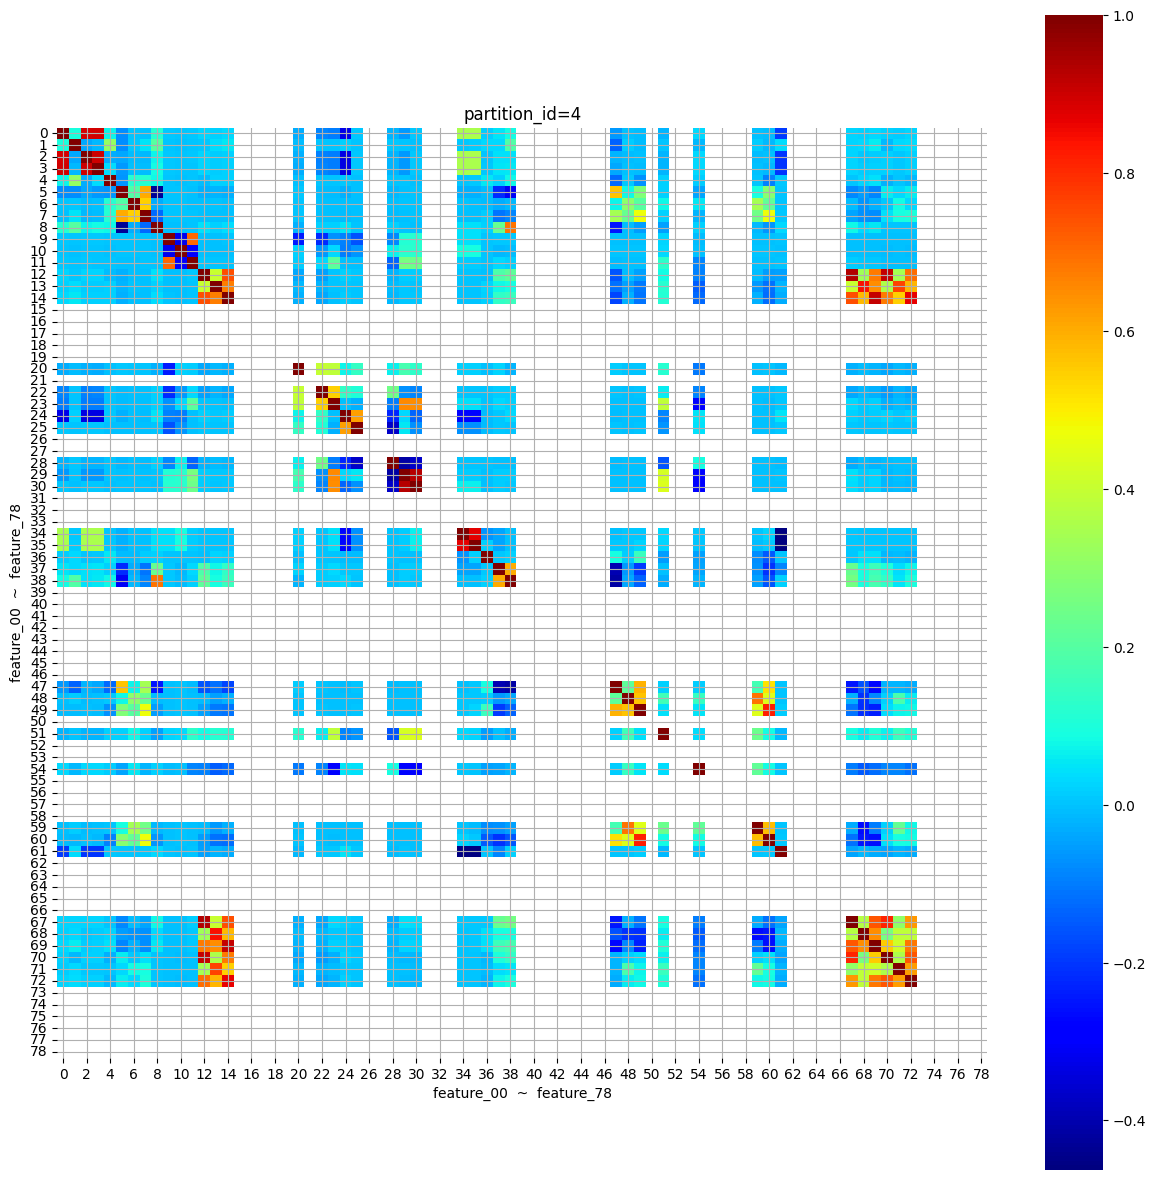

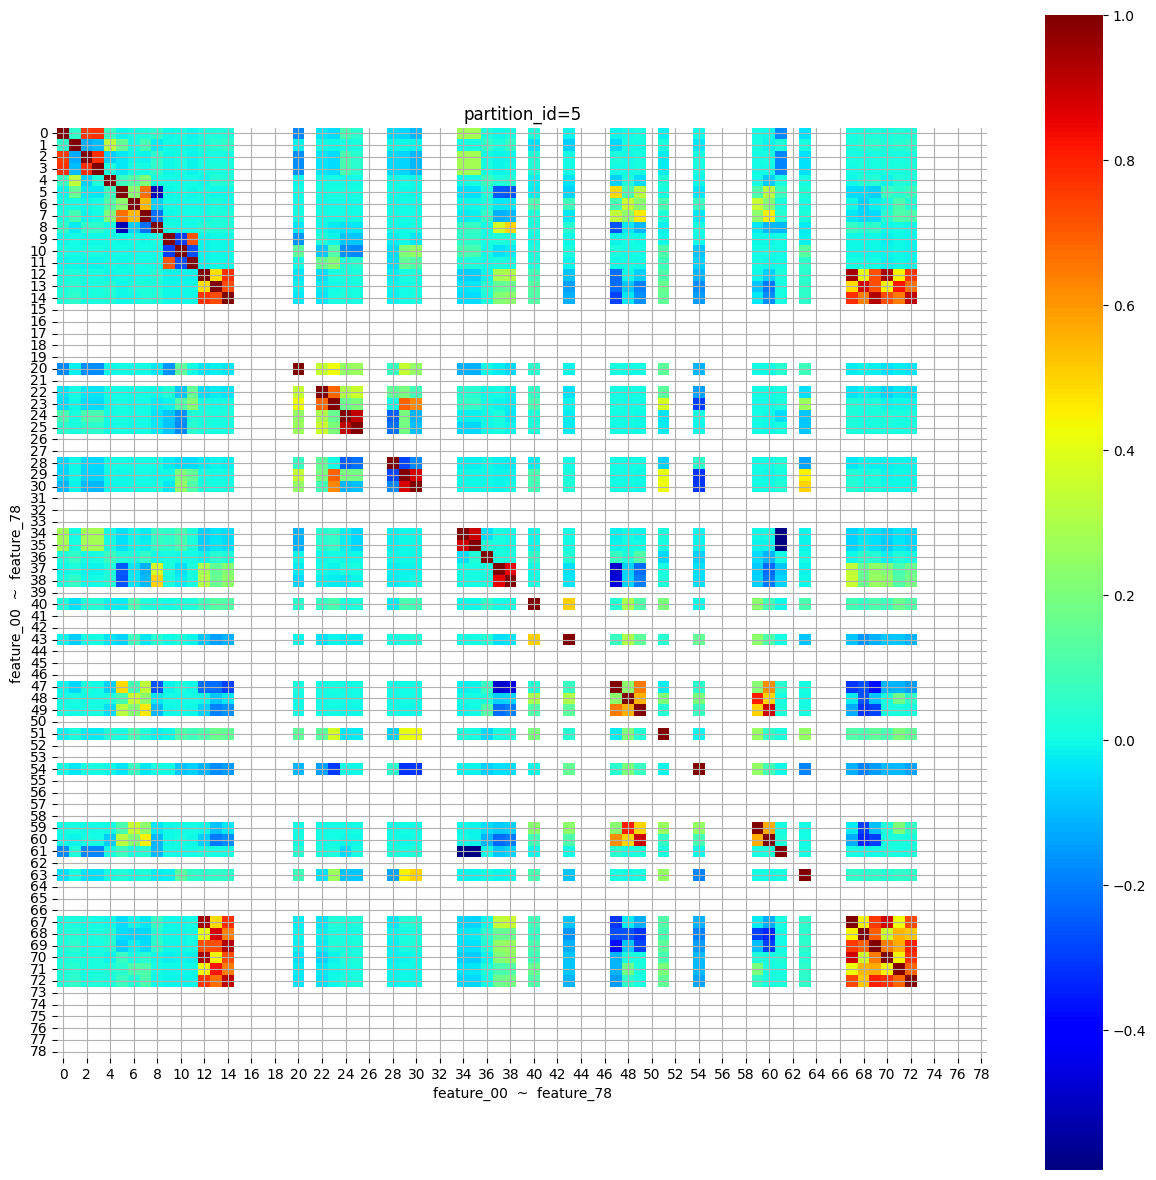

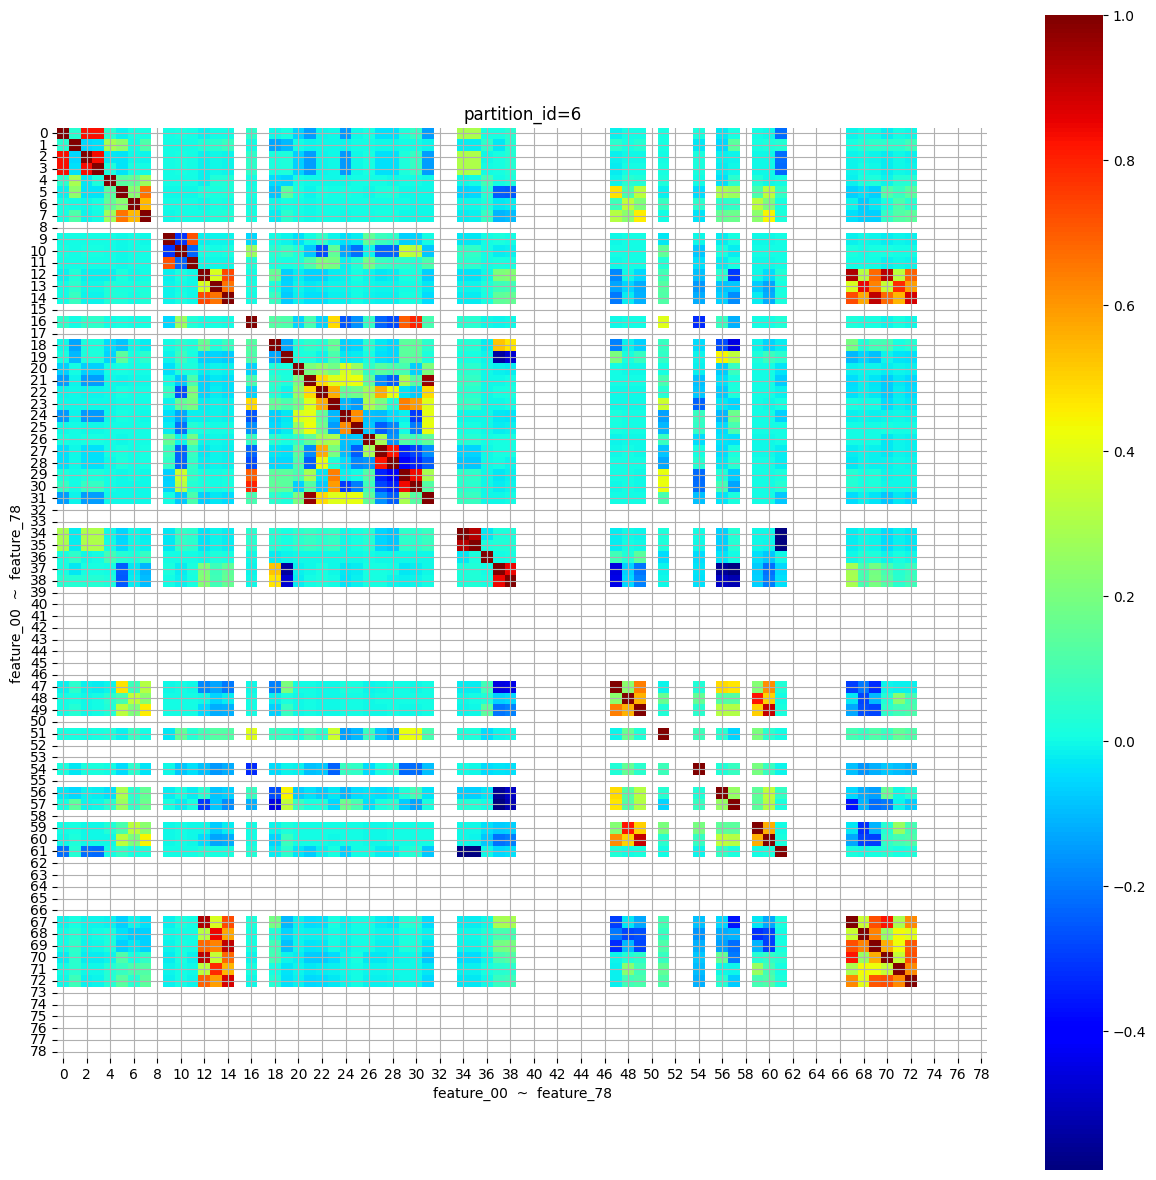

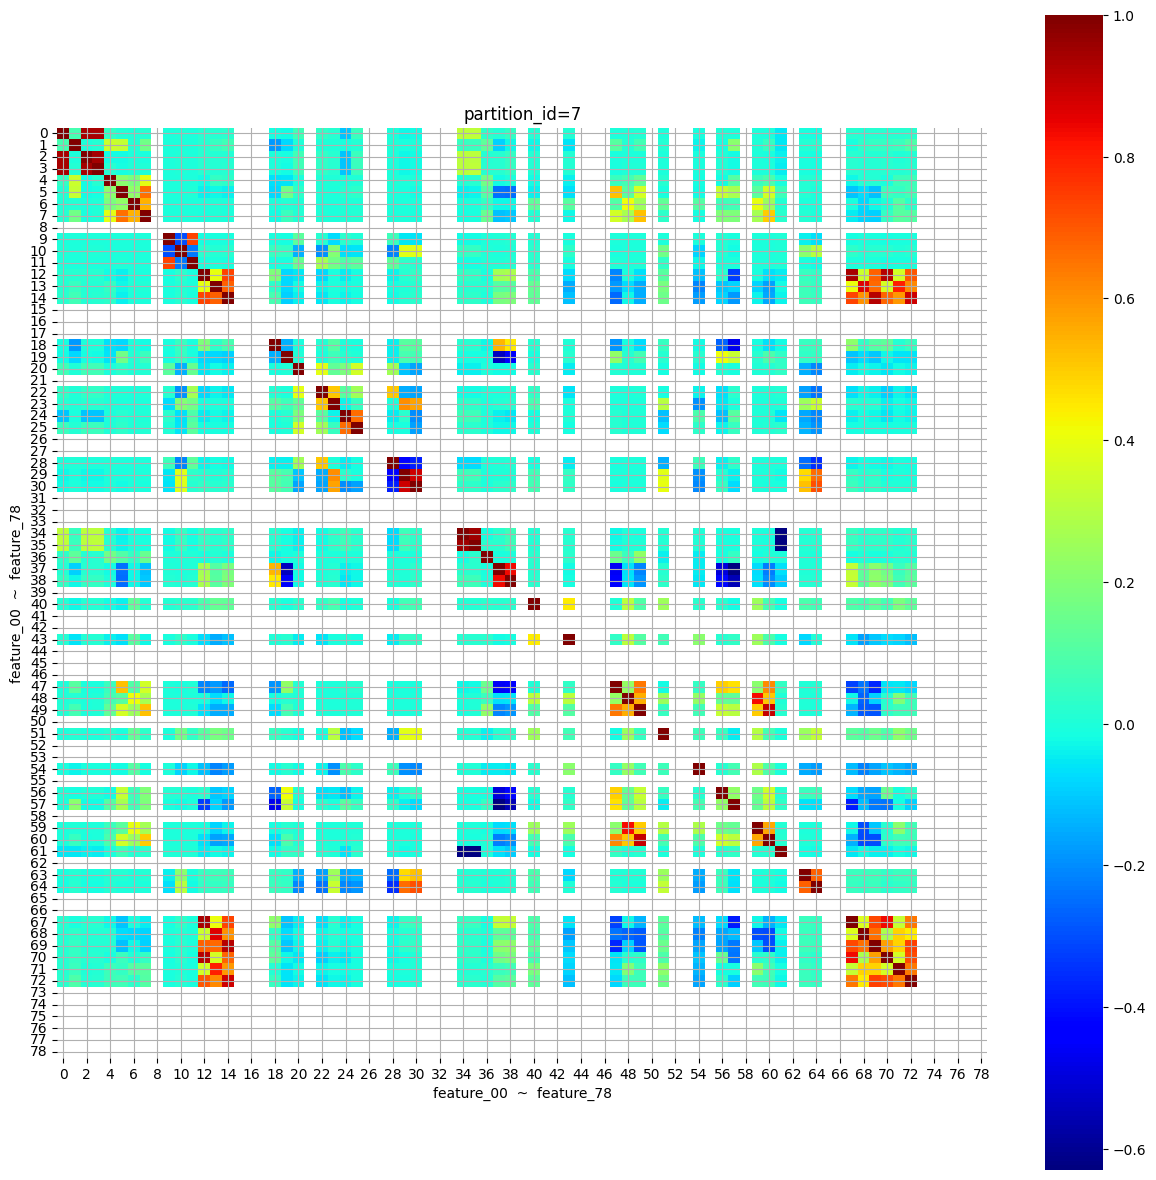

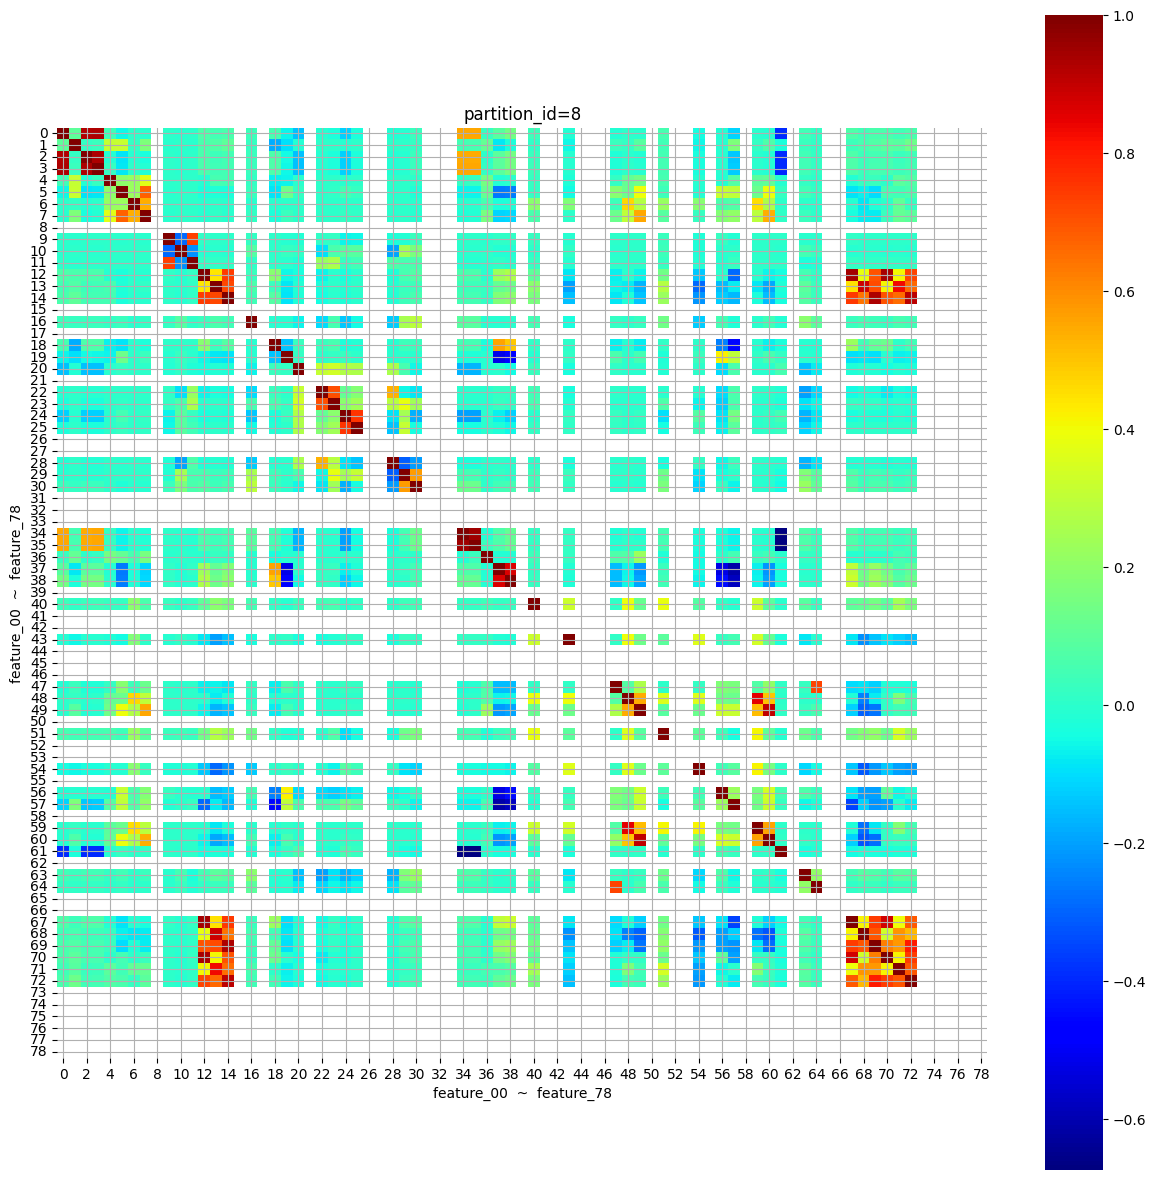

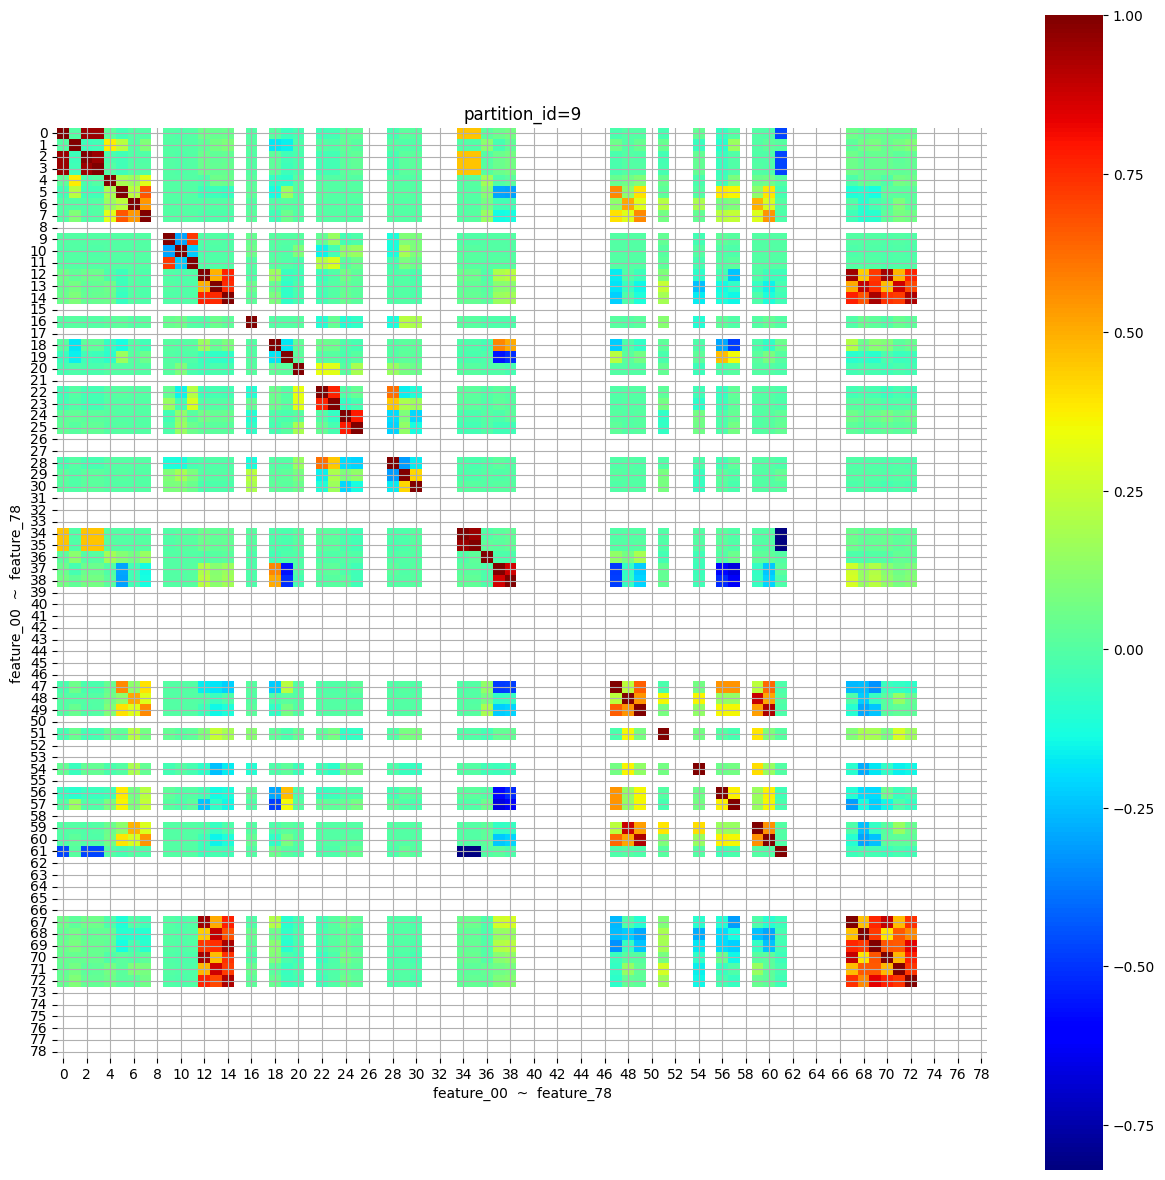

In [21]:
del train

# for each partition from 0 to 9, load the parquet file
# plot the correlation matrix of the features
for partition_id in range(10):
    train = pl.read_parquet(f"{ROOT_DIR}/train.parquet/partition_id={partition_id}/part-0.parquet")
    plt.figure(figsize=(15, 15))
    sns.heatmap(train[[f"feature_{i:02d}" for i in range(79)]].corr(), square=True, cmap="jet")
    plt.xlabel("feature_00  ~  feature_78")
    plt.ylabel("feature_00  ~  feature_78")
    plt.title(f"partition_id={partition_id}")
    plt.grid()
    plt.show()


There are quite some changes, although some group of features do remain stable throughout all 9 partitions.

## responder_0 - 8

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_0
 - mean  : 0.0084
 - sigma : 0.9559
 - min  : -5.0000
 - max  : 5.0000


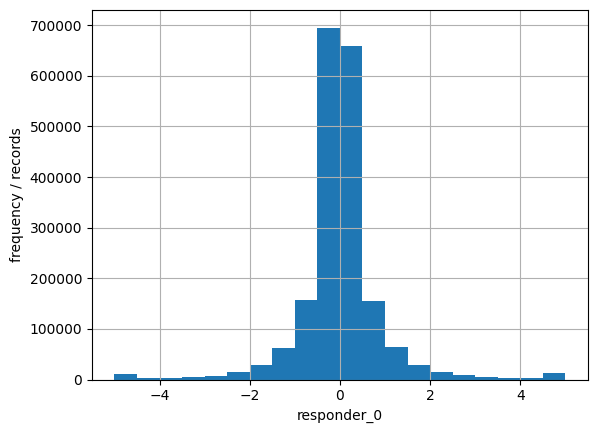

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_1
 - mean  : 0.0108
 - sigma : 1.1418
 - min  : -5.0000
 - max  : 5.0000


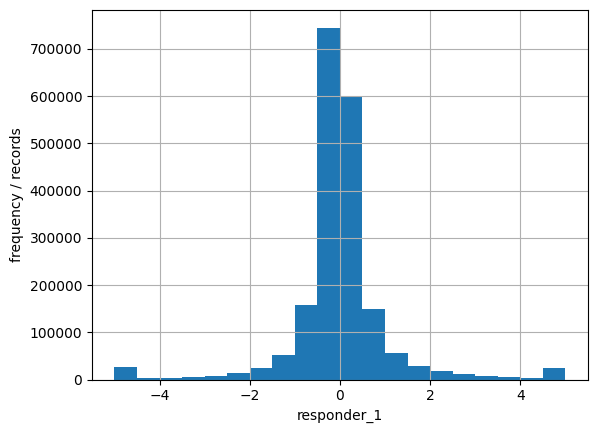

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_2
 - mean  : 0.0024
 - sigma : 0.8442
 - min  : -5.0000
 - max  : 5.0000


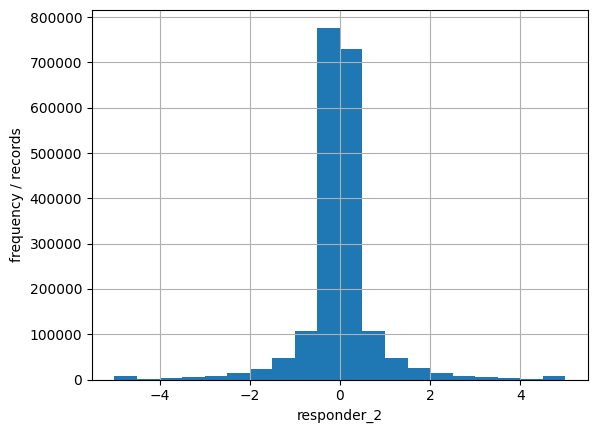

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_3
 - mean  : 0.0114
 - sigma : 1.2760
 - min  : -5.0000
 - max  : 5.0000


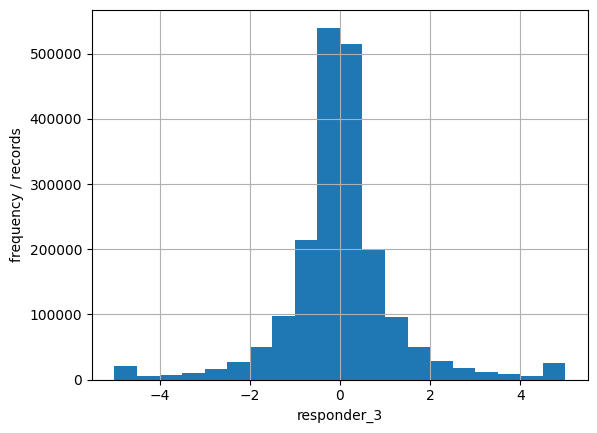

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_4
 - mean  : 0.0219
 - sigma : 1.2664
 - min  : -5.0000
 - max  : 5.0000


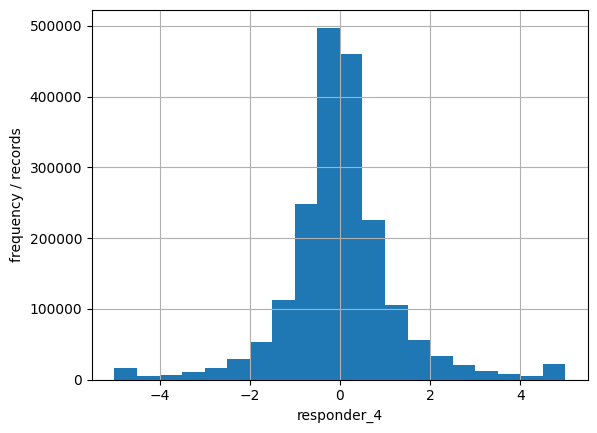

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_5
 - mean  : 0.0033
 - sigma : 1.2252
 - min  : -5.0000
 - max  : 5.0000


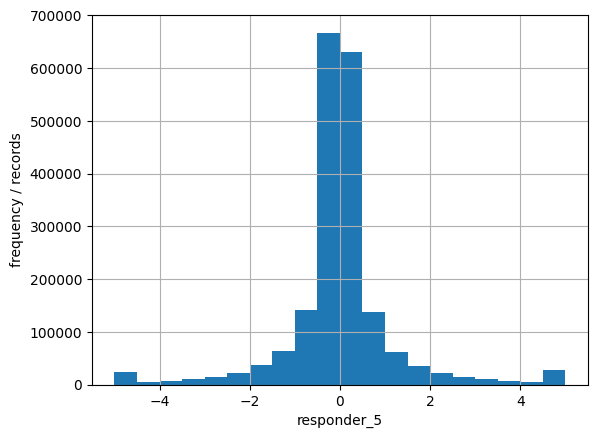

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_6
 - mean  : 0.0015
 - sigma : 0.8706
 - min  : -5.0000
 - max  : 5.0000


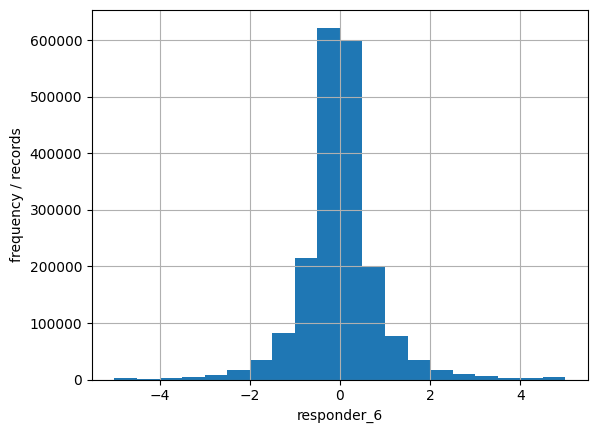

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_7
 - mean  : -0.0005
 - sigma : 0.8918
 - min  : -5.0000
 - max  : 5.0000


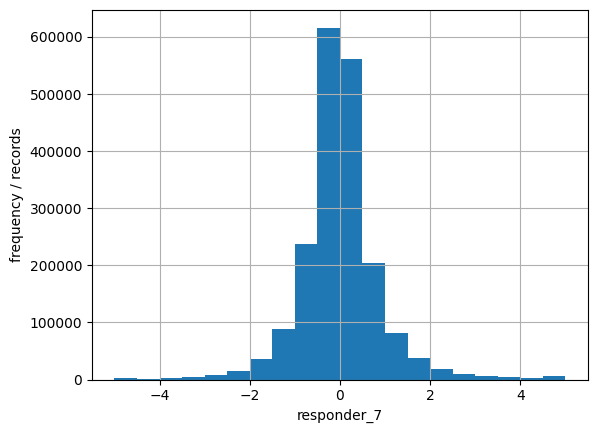

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = responder_8
 - mean  : 0.0011
 - sigma : 0.8737
 - min  : -5.0000
 - max  : 5.0000


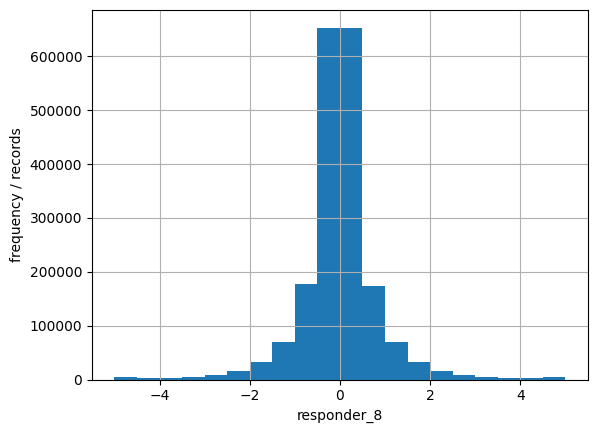

In [22]:
for target in range(9):
    col = f"responder_{target}"
    mean_, sgm_ = train[col].mean(), np.sqrt(train[col].var())
    min_, max_ = train[col].min(), train[col].max()
    print("- " * 30)
    print( f"column = {col}" )
    print( f" - mean  : {mean_:.4f}",  )
    print( f" - sigma : {sgm_:.4f}",  )
    print( f" - min  : {min_:.4f}",  )
    print( f" - max  : {max_:.4f}",  )
    
    plt.hist(train[col], bins=20)
    plt.xlabel(col)
    plt.ylabel("frequency / records")
    #plt.yscale("log")
    plt.grid()
    plt.show()

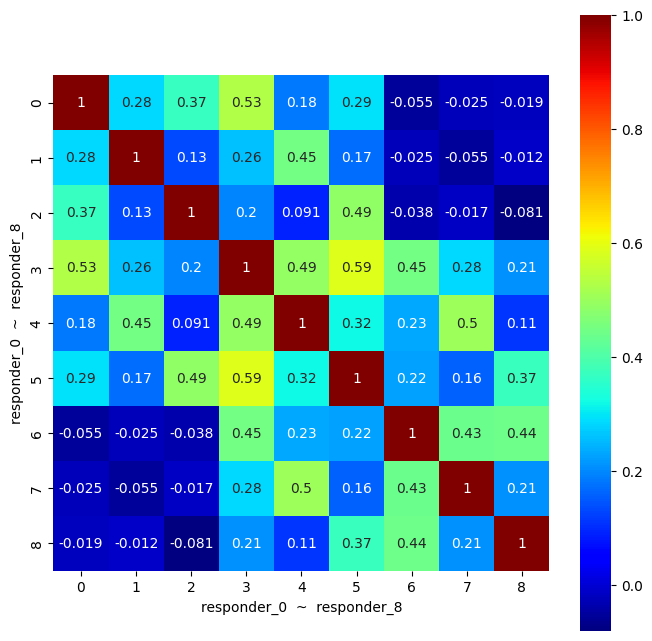

In [23]:
plt.figure(figsize=(8, 8))
sns.heatmap(train[[ f"responder_{target}" for target in range(9)]].corr(),  annot=True, square=True, cmap="jet")
plt.xlabel("responder_0  ~  responder_8")
plt.ylabel("responder_0  ~  responder_8")
plt.show()

The correlation between the responders is not high. Why is that?  
Is there a way to use the information of other responders to predict `responder_6`?

Similar to features, we should check the correlation between responders by time.  
We will also plot the correlation between responder_6 and the features, as a way to quantify **if the responder was stable.**


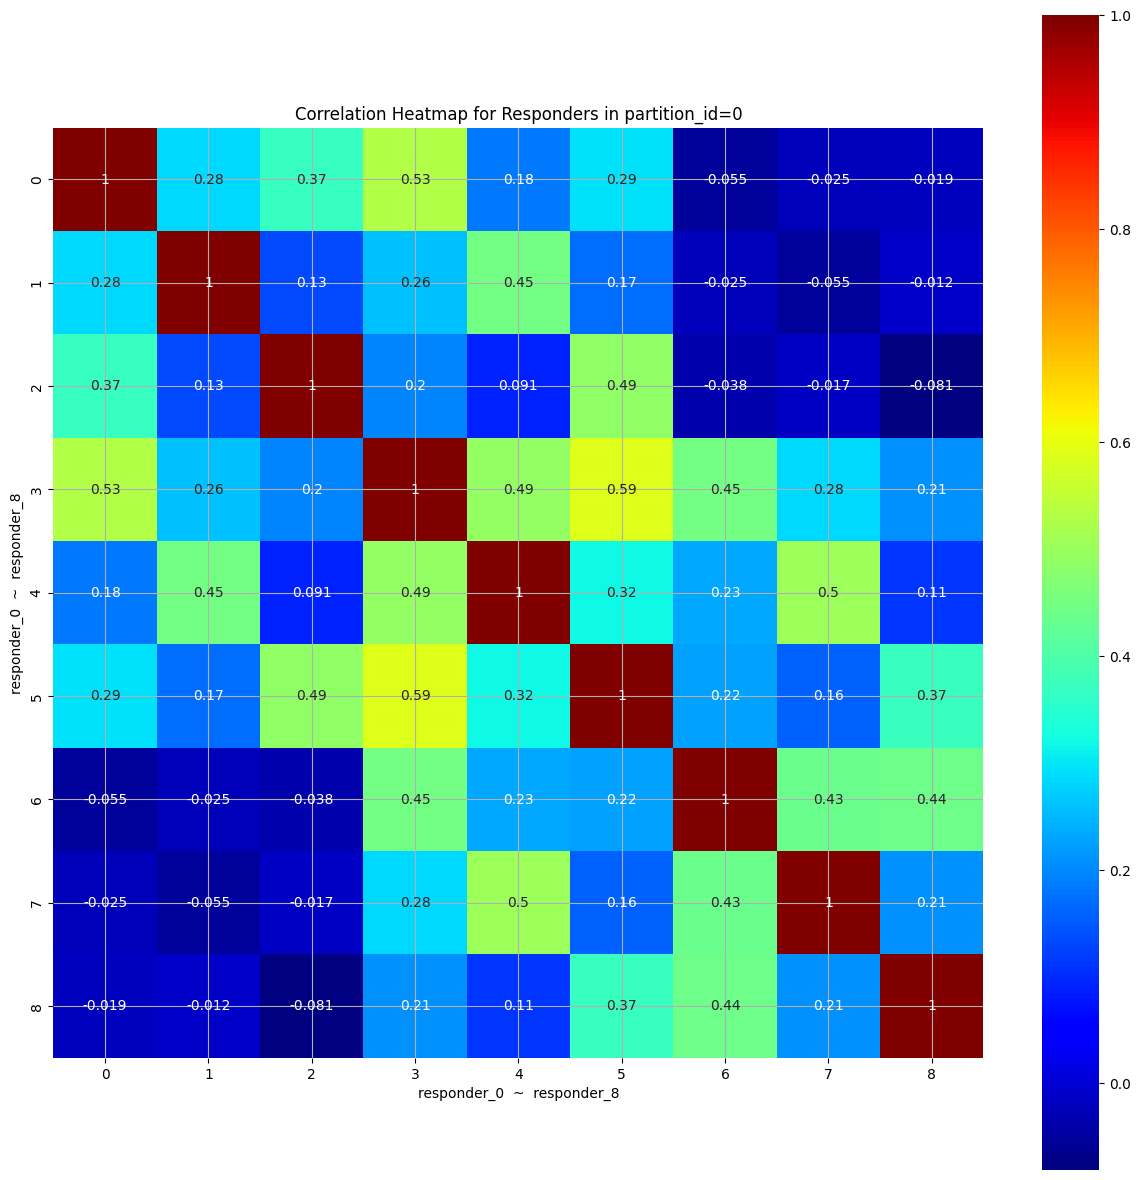

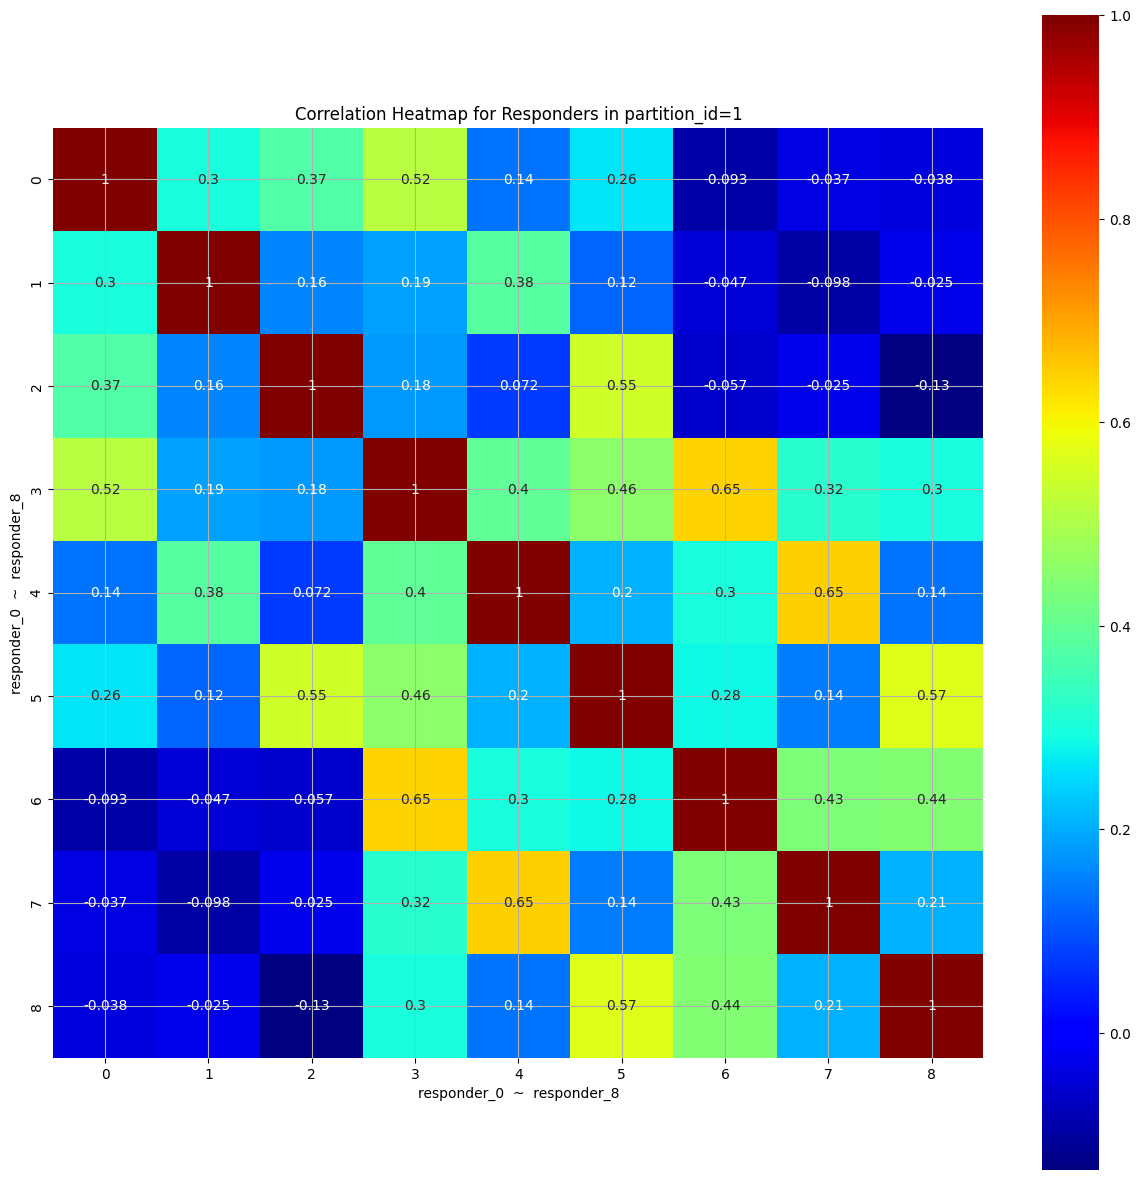

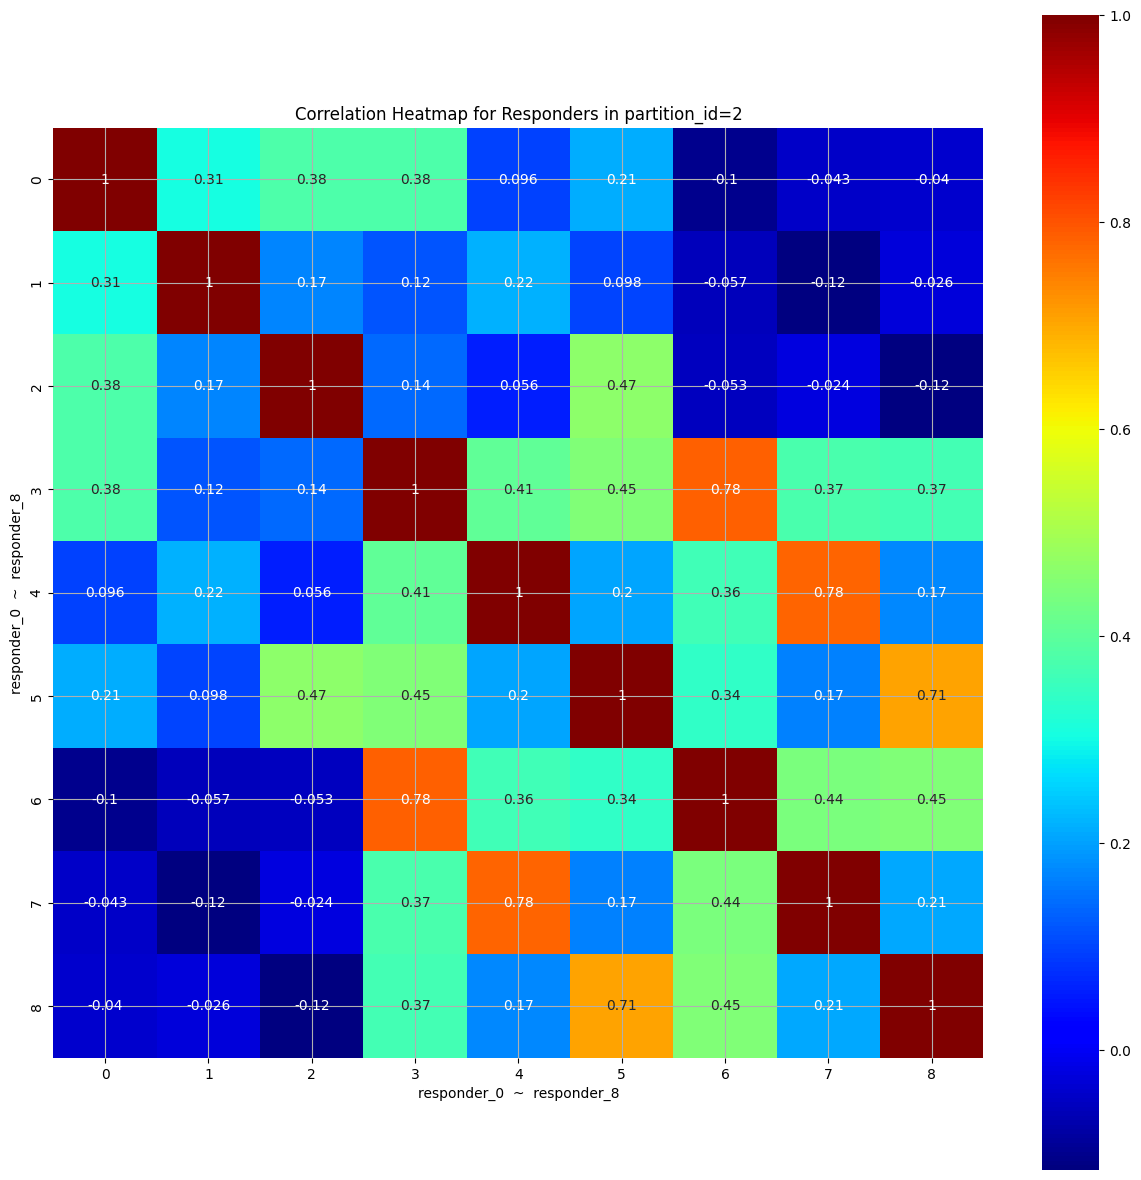

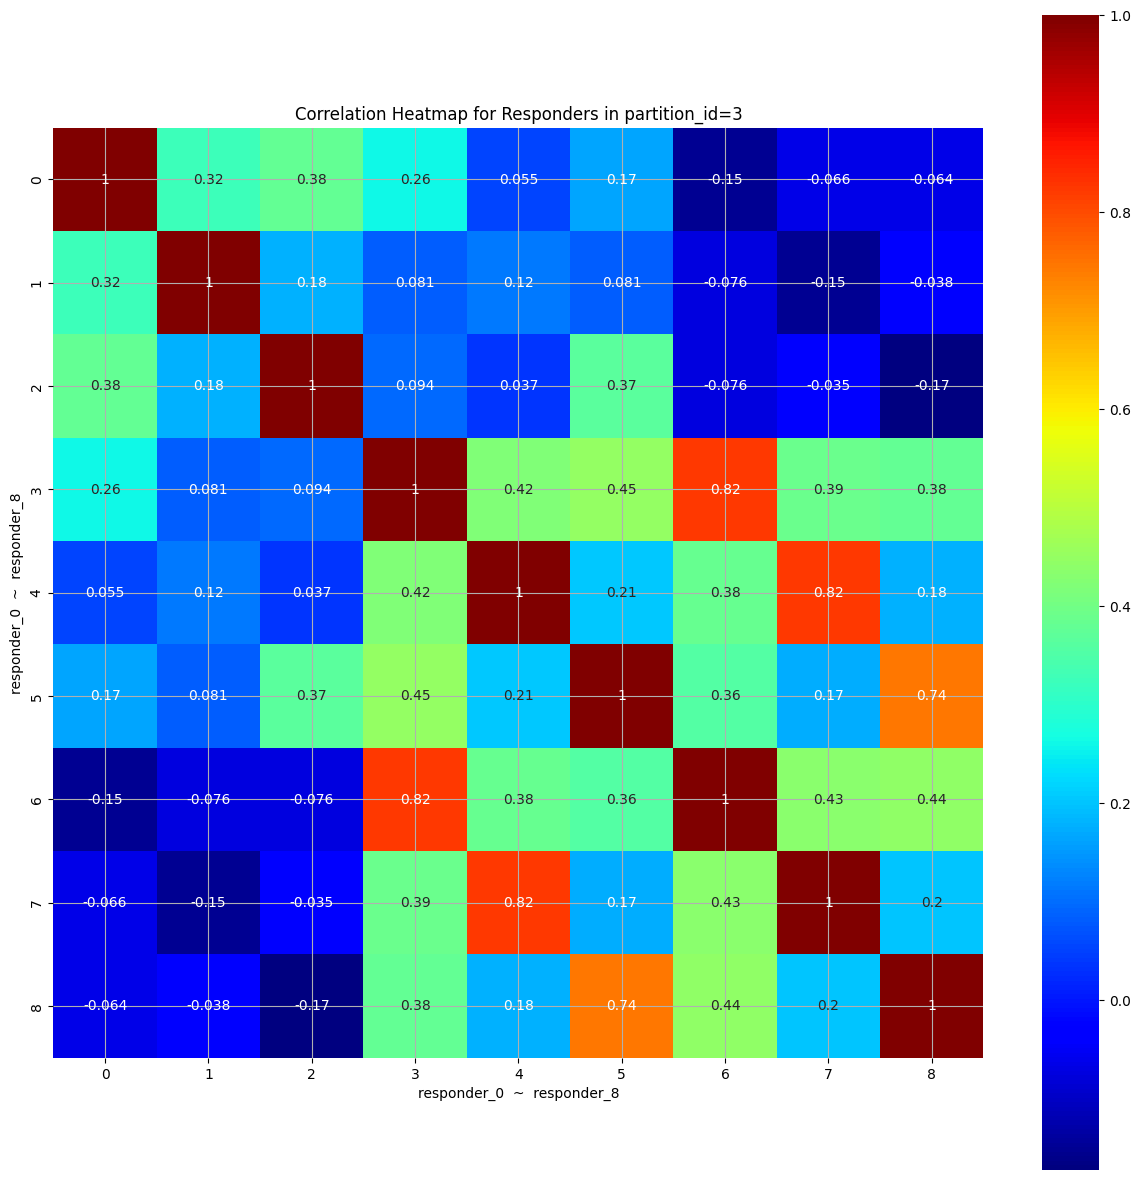

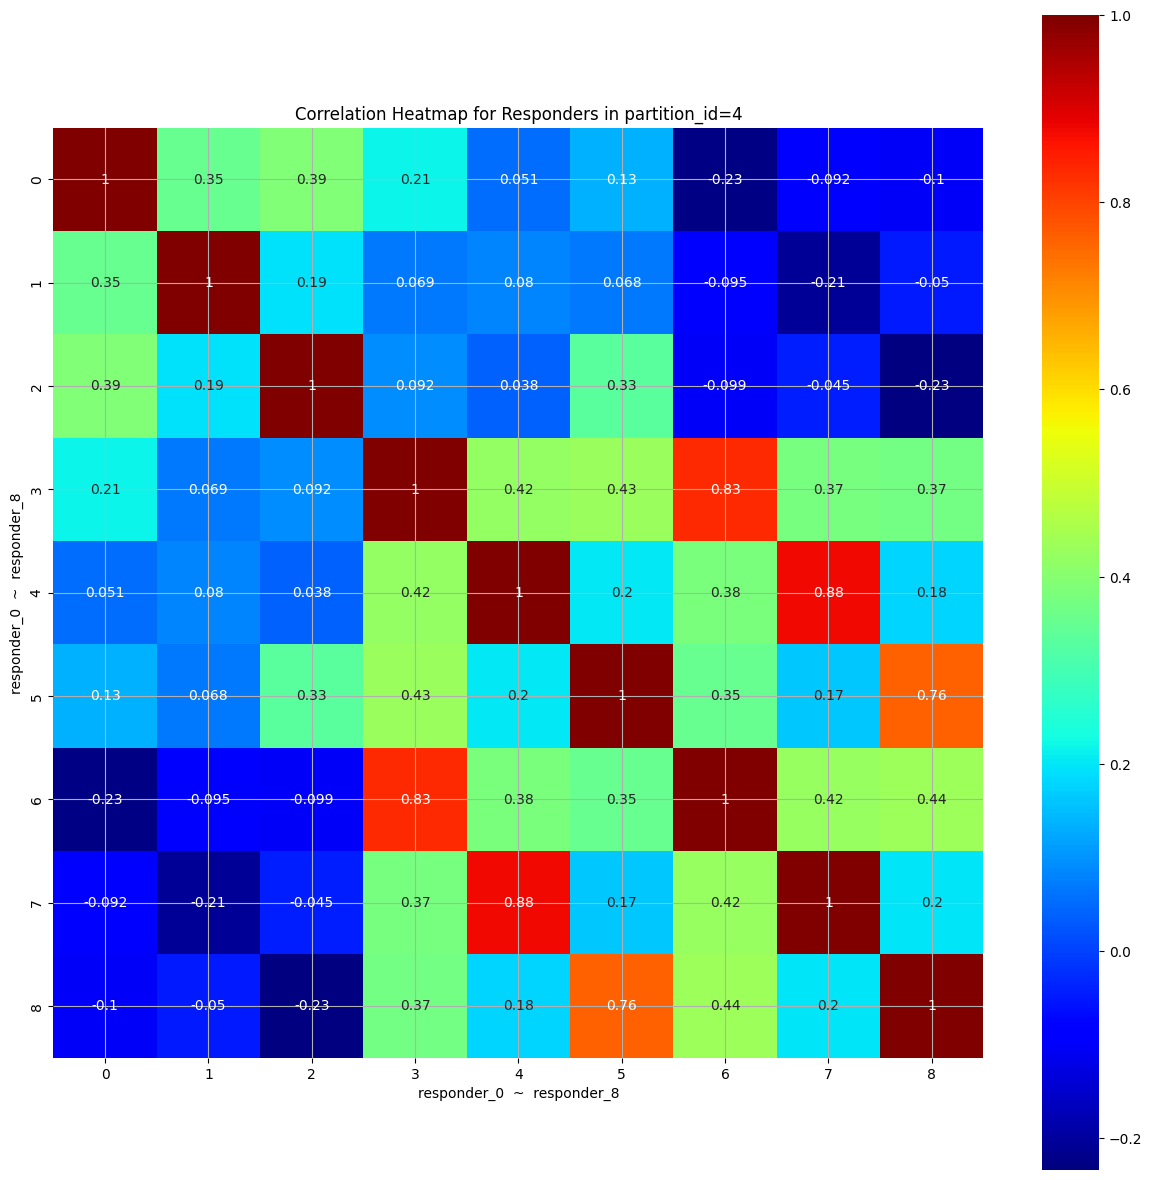

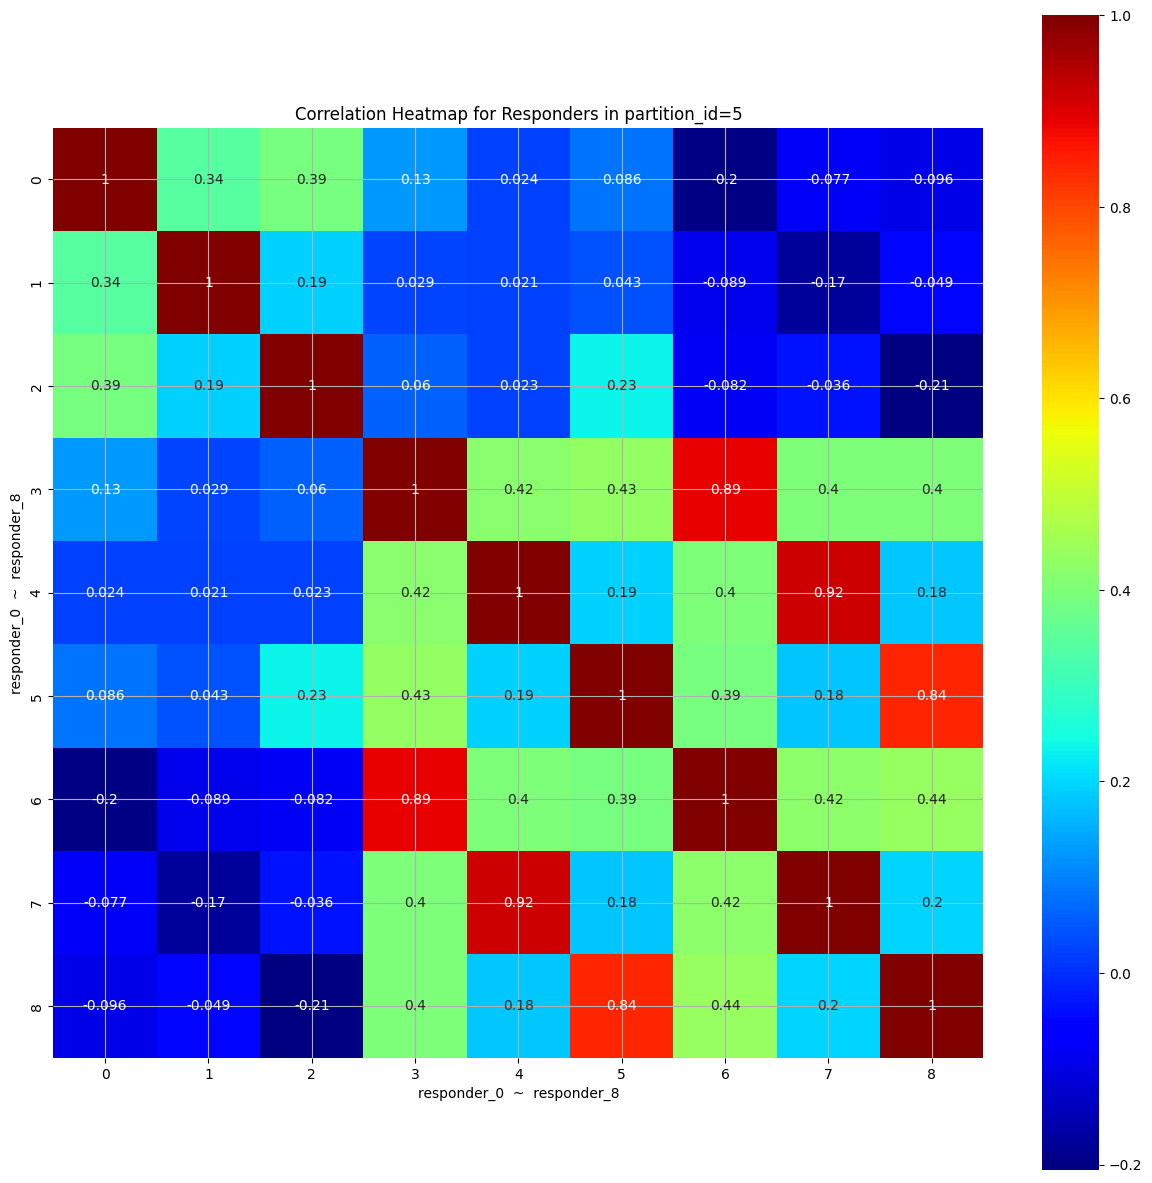

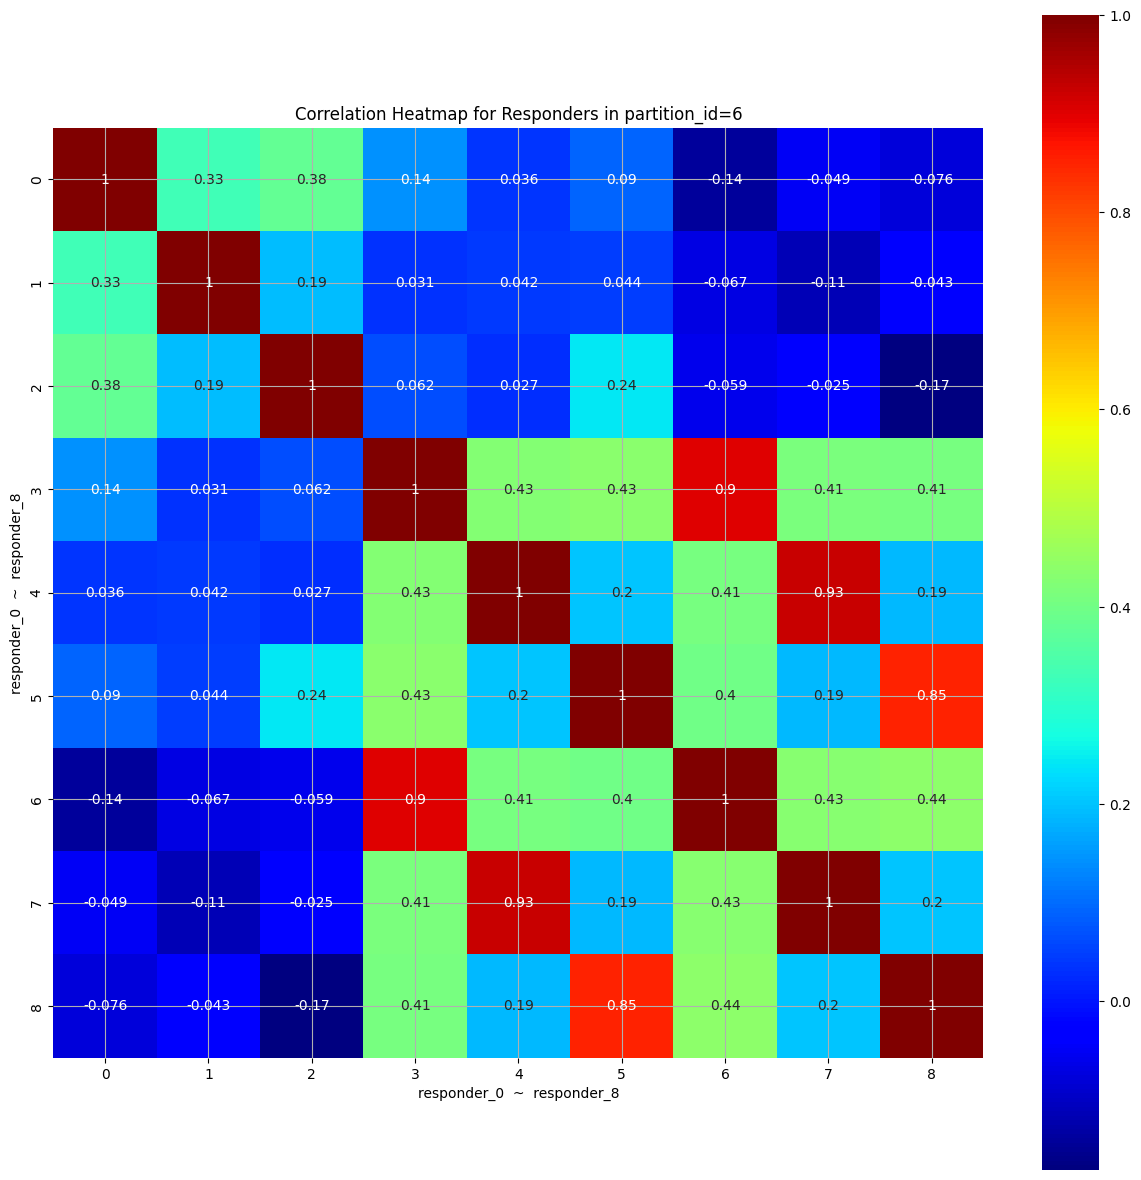

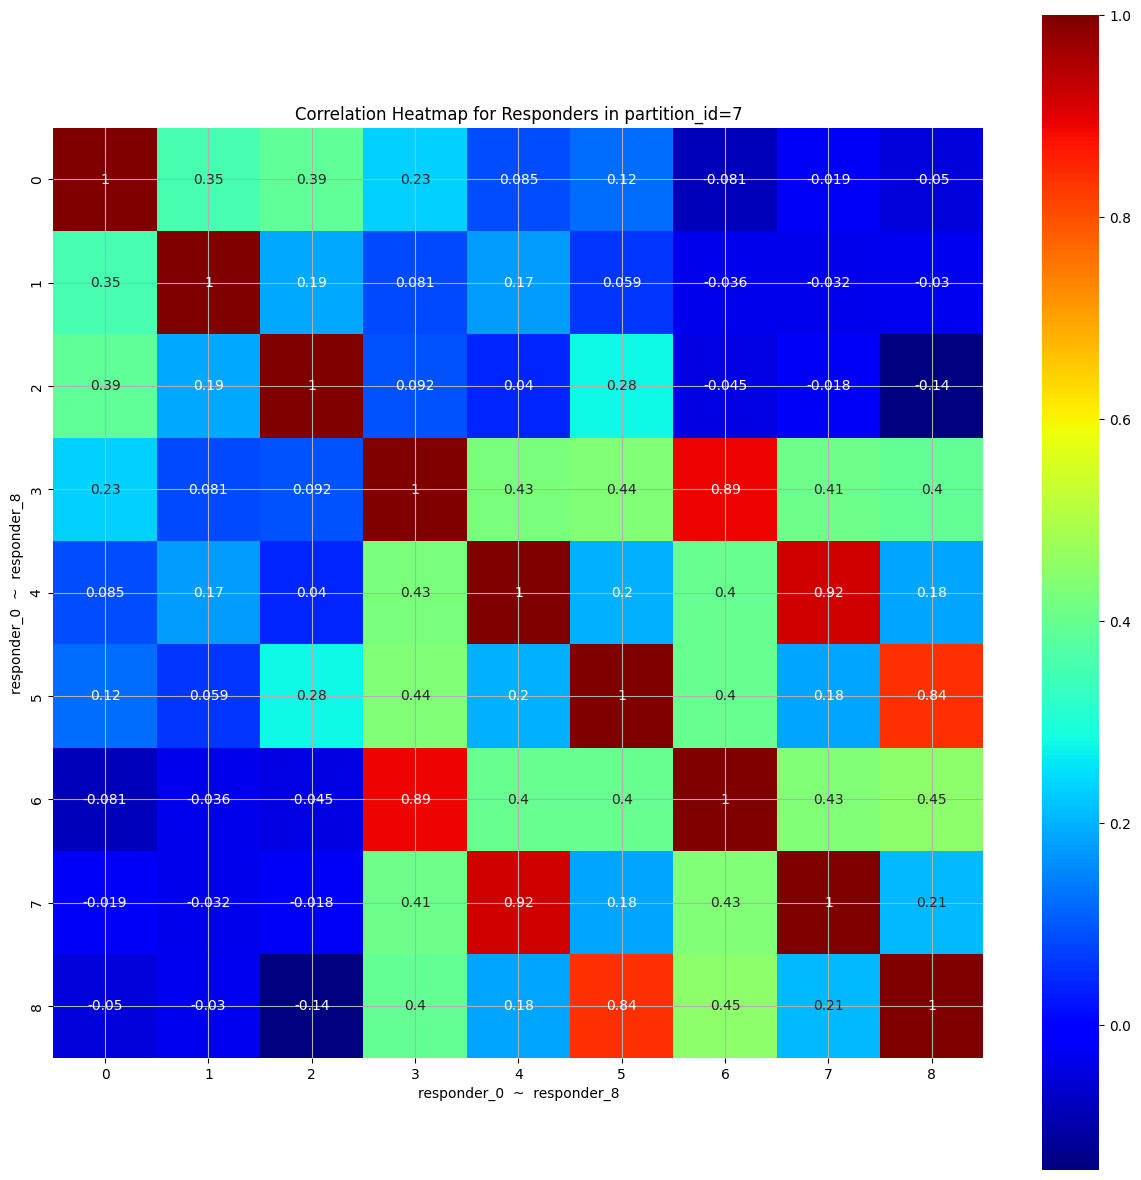

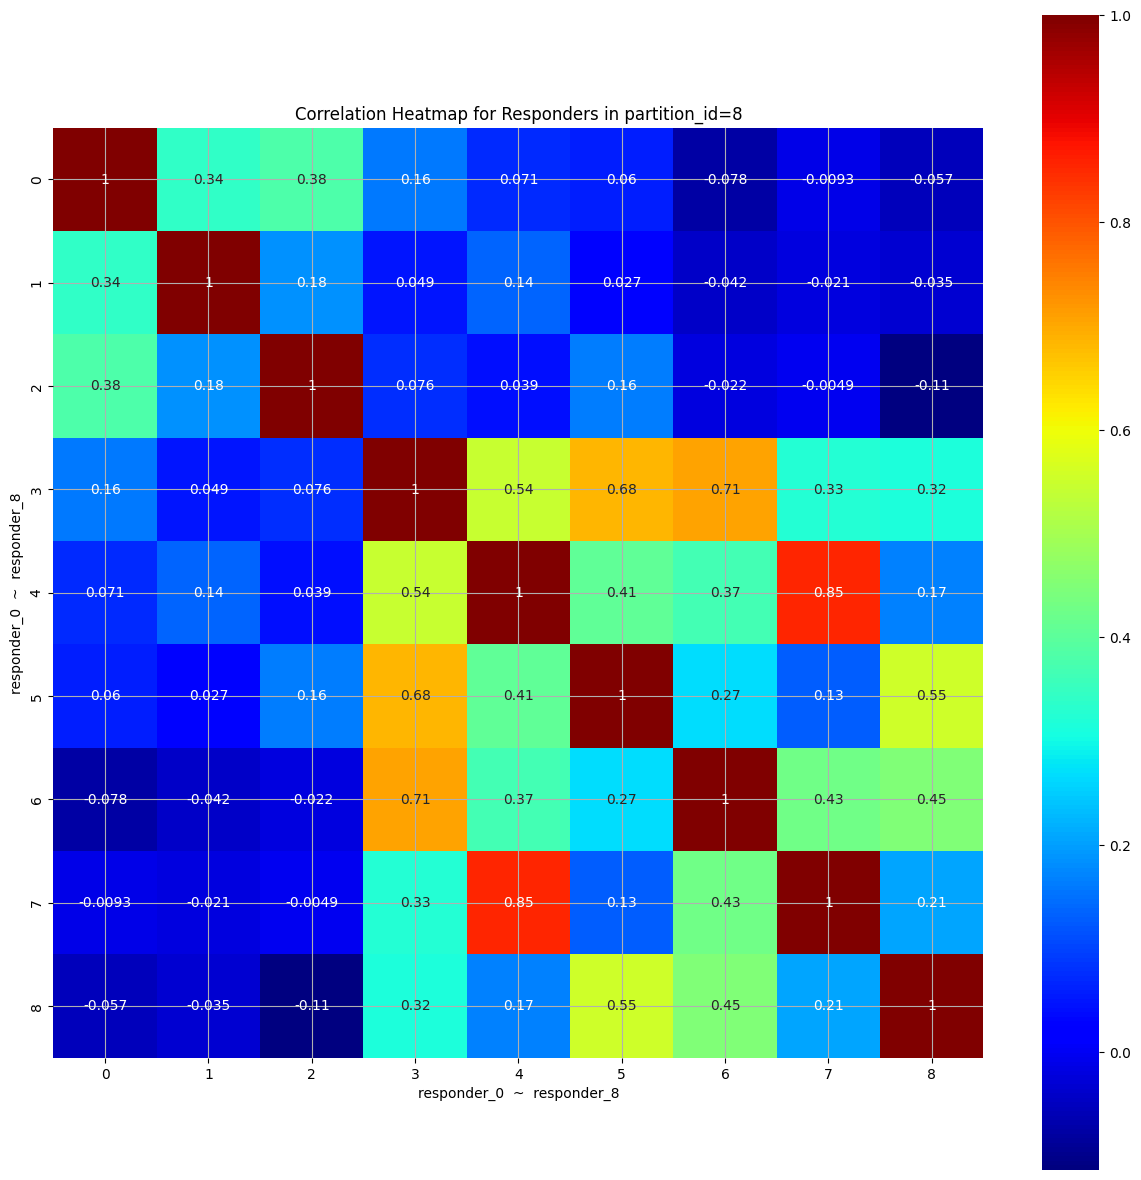

In [ ]:
for i in range(0, 10):
  train = pl.read_parquet(f"{ROOT_DIR}/train.parquet/partition_id={i}/part-0.parquet")
 
  plt.figure(figsize=(15, 15))
  sns.heatmap(train[[f"responder_{target}" for target in range(9)]].corr(), annot=True, square=True, cmap="jet")
  plt.title(f'Correlation Heatmap for Responders in partition_id={i}')
  plt.xlabel("responder_0  ~  responder_8")
  plt.ylabel("responder_0  ~  responder_8")
  plt.grid()
  plt.show()

In [25]:
correlation_scores = {}

for i in range(0, len(unique_date_ids), 30):
  date_id_subset = unique_date_ids[i:i+30]
  subset = train_cleaned.filter(pl.col('date_id').is_in(date_id_subset))
  
  correlation_matrix = subset[[f"responder_{target}" for target in range(9)]].to_pandas().corr()
  correlation_scores[f'{date_id_subset[0]}-{date_id_subset[-1]}'] = correlation_matrix.loc['responder_6']

correlation_scores_df = pd.DataFrame(correlation_scores).T
correlation_scores_df

,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0-29,-0.036751,-0.020628,-0.030216,0.415568,0.210647,0.216802,1.0,0.447703,0.450597
30-59,-0.055338,-0.019466,-0.030998,0.347422,0.191452,0.205631,1.0,0.400091,0.433453
60-89,-0.050924,-0.033016,-0.036116,0.383108,0.186410,0.205047,1.0,0.410731,0.430090
90-119,-0.055657,-0.034368,-0.031952,0.408674,0.207120,0.225508,1.0,0.420792,0.424518
120-150,-0.074996,-0.040331,-0.043354,0.446459,0.214090,0.226429,1.0,0.418387,0.433623
151-169,-0.063114,-0.035831,-0.044179,0.540106,0.232704,0.258336,1.0,0.425645,0.426714


Although in general, the score is pretty stable, there are some significant changes. Maybe we should look at these changes more closely.

## symbol_id

> train.parquet/partition_id=0/part-0.parquet
symbol_id:  0 - 38


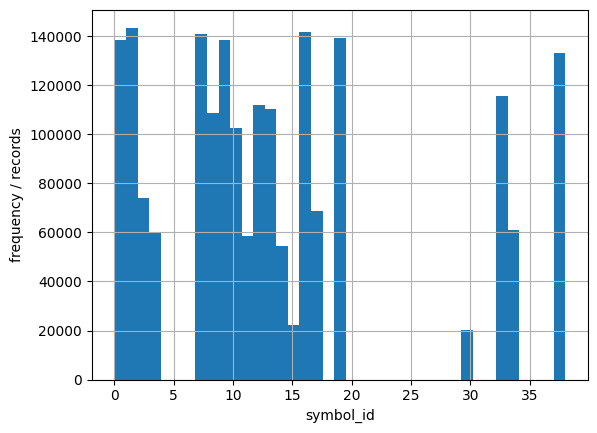

> train.parquet/partition_id=1/part-0.parquet
symbol_id:  0 - 38


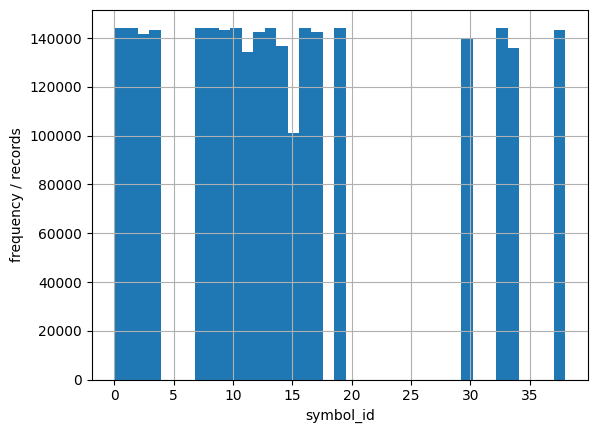

> train.parquet/partition_id=2/part-0.parquet
symbol_id:  0 - 38


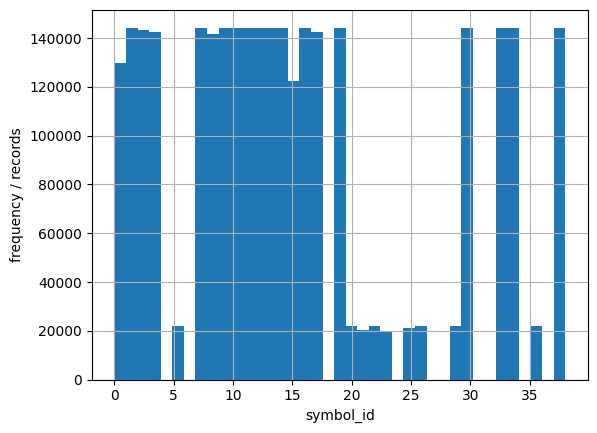

> train.parquet/partition_id=3/part-0.parquet
symbol_id:  0 - 38


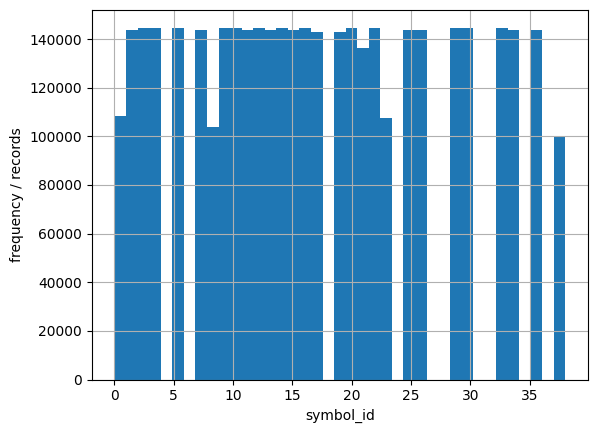

> train.parquet/partition_id=4/part-0.parquet
symbol_id:  0 - 38


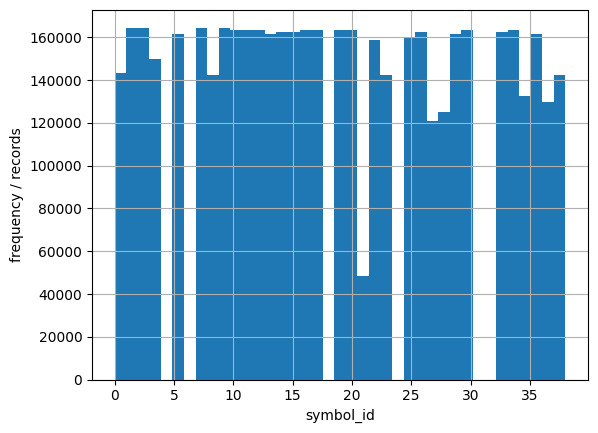

> train.parquet/partition_id=5/part-0.parquet
symbol_id:  0 - 38


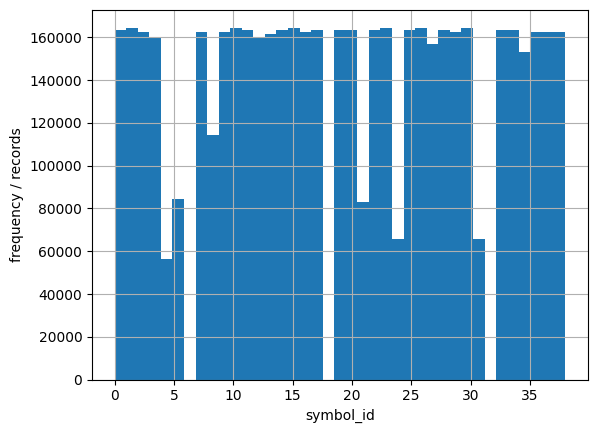

> train.parquet/partition_id=6/part-0.parquet
symbol_id:  0 - 38


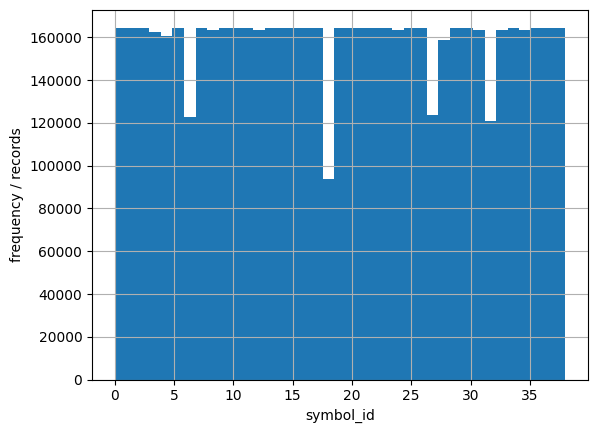

> train.parquet/partition_id=7/part-0.parquet
symbol_id:  0 - 38


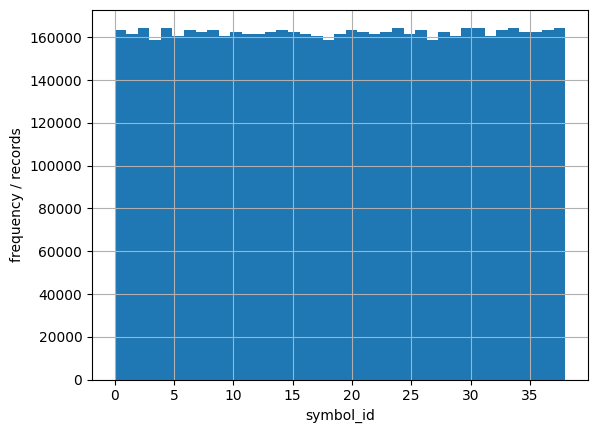

> train.parquet/partition_id=8/part-0.parquet
symbol_id:  0 - 38


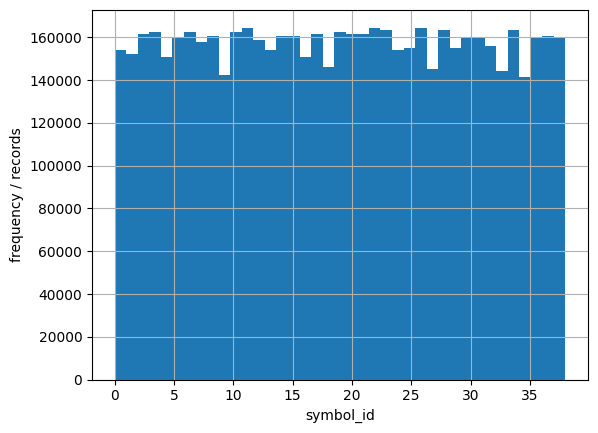

> train.parquet/partition_id=9/part-0.parquet
symbol_id:  0 - 38


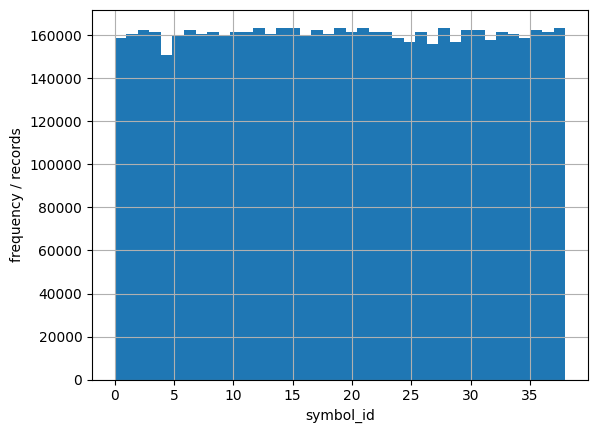

In [26]:
for partition_id in range(10):
    print(f"> train.parquet/partition_id={partition_id}/part-0.parquet")
    train_data = pl.read_parquet(f"{ROOT_DIR}/train.parquet/partition_id={partition_id}/part-0.parquet")

    print( f"symbol_id: ", train_data["symbol_id"].min(), "-", train_data["symbol_id"].max())
    bins = train_data["symbol_id"].max() - train_data["symbol_id"].min() + 1
    plt.hist(train_data["symbol_id"], bins=bins)
    plt.xlabel("symbol_id")
    plt.ylabel("frequency / records")
    plt.grid()
    plt.show()

## date_id

In [ ]:
for partition_id in range(10):
    print(f"> train.parquet/partition_id={partition_id}/part-0.parquet")
    train_data = pl.read_parquet(f"{ROOT_DIR}/train.parquet/partition_id={partition_id}/part-0.parquet")

    print( f"date_id: ", train_data["date_id"].min(), "-", train_data["date_id"].max())
    bins = train_data["date_id"].max() - train_data["date_id"].min() + 1
    plt.hist(train_data["date_id"], bins=bins)
    plt.xlabel("date_id")
    plt.ylabel("frequency / records")
    plt.grid()
    plt.show()

# Test.parquet

- **test.parquet** - A mock test set which represents the structure of the unseen test set. This example set demonstrates a single batch served by the evaluation API, that is, data from a single `date_id, time_id` pair. The test set contains columns including `date_id`, `time_id`, `symbol_id`, `weight` and `feature_{00...78}`. You will not be directly using the test set or sample submission in this competition, as the evaluation API will get/set the test set and predictions.

In [ ]:
!tree {ROOT_DIR}/test.parquet/

In [ ]:
test = (
    pl.read_parquet(f"{ROOT_DIR}/test.parquet/date_id=0/part-0.parquet")
)
test.shape

In [ ]:
test

## Missing values

In [ ]:
supervised_usable = (
    test
)

missing_count = (
    supervised_usable
    .null_count()
    .transpose(include_header=True,
               header_name='feature',
               column_names=['null_count'])
    .sort('null_count', descending=True)
    .with_columns((pl.col('null_count') / len(supervised_usable)).alias('null_ratio'))
)

plt.figure(figsize=(6, 20))
plt.title(f'Missing values over the {len(supervised_usable)} samples which have a target')
plt.barh(np.arange(len(missing_count)), missing_count.get_column('null_ratio'), color='coral', label='missing')
plt.barh(np.arange(len(missing_count)), 
         1 - missing_count.get_column('null_ratio'),
         left=missing_count.get_column('null_ratio'),
         color='darkseagreen', label='available')
plt.yticks(np.arange(len(missing_count)), missing_count.get_column('feature'))
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
plt.xlim(0, 1)
plt.legend()
plt.show()

# lags.parquet

- `lags.parquet` - Values of `responder_{0...8}` lagged by one `date_id`. The evaluation API serves the entirety of the lagged responders for a `date_id` on that date_id's first `time_id`. In other words, all of the previous date's responders will be served at the first time step of the succeeding date.

In [ ]:
!tree {ROOT_DIR}/lags.parquet

In [ ]:
lags = (
    pl.read_parquet(f"{ROOT_DIR}/lags.parquet/date_id=0/part-0.parquet")
)
lags.shape

In [ ]:
lags.columns

In [ ]:
lags

In [ ]:
plt.plot(lags["responder_6_lag_1"])
plt.grid()
plt.xlabel("symbol_id")
plt.ylabel("responder_6_lag_1")
plt.show()